# Load data


In [7]:
from function import *
import pandas as pd
import pandas as pd
import geopandas as gpd
from typing import Sequence



abandon_2d_variable = [
    "current_abandonment",
    "recultivation", 
    "abandonment_duration",
    "abandonment_year"
]
fea_3d_variable = [
    'GDPpc',
    'GDPtot',   
    'GURdist',
    'Population',
    'gdmp',
    'rsds',
    'tas',
    'wind'
]
fea_2d_variable = [
    'DEM',
    'Powerdist',
    'PrimaryRoad',
    'SecondaryRoad',
    'Slope',
    'TertiaryRoad'
]
PATHS = {
    'abandonment': r"D:\xarray\merged_chunk_2\*.nc",
    'feature':     "D:/xarray/aligned2/Feature_all/*.nc",
    'csv':         "aligned_for_training0519.csv",
    'prediction':  "",
    'prediction_us': r"data\abandon_filtered_with_scores.csv",
    'test_output': "positive_samples_test_500.csv",
    'output':      "positive_samples_full_with_features.csv",
    'CN_sheng': r'data\sheng2022.shp',
    'World_shp': r'data\main_ADM_0.shp', 
    'us_abandon': r'data\us_abandon_clean.csv',
    'us_pv_embedding': r'data\training_embedding.csv'
}

ZERO_COLS = [
     'GDPpc', 'GDPtot', 'GURdist', 'Population',
    'PrimaryRoad', 'SecondaryRoad', 'TertiaryRoad', 'gdmp'
]
YEARS = [2018, 2020]

NUMERIC_FEATURES = [
    'lat','lon','GDPpc', 'GDPtot', 'GURdist', 'DEM','Slope',
    'Population','Powerdist','PrimaryRoad','SecondaryRoad','TertiaryRoad',
    'gdmp','rsds','tas','wind'
]
CAT_COLS = ['landcover']

ABANDON_COLS = ['abandonment_year','abandonment_duration', 'current_abandonment']

NONE_ABANDON_COLS = ['recultivation']

time=['2018-01-01','2020-01-01']


us_df_abandon_filtered = pd.read_csv(PATHS['prediction_us'])
ds_abandon, ds_feat = load_datasets(PATHS['abandonment'], PATHS['feature'])
ds_merge=xr.merge([ds_abandon, ds_feat])









gogogo


KeyboardInterrupt: 

# 碳排放净减少效益测算

Given the'us_df_abandon_filtered' dataframe. 

| T_cell | 气温、辐射、风速 | a1+a2×Temperature+a3×Radiation+a4×Wind，其中a1=4.3℃，a2=0.0943（常数），a3=0.028℃/（辐射单位），a4=-1.528℃/（风速单位） | 这里将原文献仅用辐照数据的参数进一步改进 |
| ------ | -------- | ------------------------------------------------------------------------------------------------- | -------------------- |



输入数据：

将PV减排因子等价成对应能源系统的二氧化碳排放因子。

$$EF_{pv,mitigation}=E_{grid,CM}=EF_{grid,OM}W_{OM}+EF_{grid,BM}W_{BM}$$

一般来说，已经给出了各个国家的CM边际排放因子，可以直接沿用即可

us:352 gCO2/kWh


In [9]:
us_df_abandon_filtered

,Unnamed: 0,time,lat,lon,abandonment_year,abandonment_duration,current_abandonment,landcover,DEM,GDPpc,...,Powerdist,PrimaryRoad,SecondaryRoad,Slope,TertiaryRoad,gdmp,rsds,tas,wind,env_scores
0,2094,2020-01-01,25.004168,-107.545830,2018.0,6.0,1,2.0,128.7500,22847.0,...,622572.70,9.479545,2.584110,0.922605,44.558012,65.551445,20.555853,2981.984506,1.413225,0.305240
1,4586,2020-01-01,25.012500,-107.612500,2017.0,7.0,1,2.0,96.3125,11575.0,...,622572.60,7.480710,2.584110,4.124147,77.081042,76.545799,20.408821,2982.749690,1.381223,0.264706
2,4601,2020-01-01,25.012500,-107.487500,2017.0,7.0,1,2.0,176.3750,22847.0,...,622572.70,9.479545,2.584110,2.743563,51.958872,80.134598,20.785990,2980.215050,1.337188,0.293005
3,9586,2020-01-01,25.029167,-107.612500,2017.0,7.0,1,2.0,77.1250,11575.0,...,622572.60,7.480710,2.584110,1.319031,77.081042,62.175598,20.607885,2983.972465,1.395731,0.182346
4,9850,2020-01-01,25.029167,-105.412500,2017.0,7.0,1,2.0,1730.6250,10594.0,...,622573.30,7.372286,15.512376,1.524049,217.405949,104.869400,22.585236,2913.419221,1.931024,0.223332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70307,20522499,2020-01-01,48.187500,-65.837500,1998.0,26.0,1,3.0,46.5000,29640.0,...,622564.00,15.564339,0.007833,2.177264,91.230789,70.525002,12.947352,2763.749943,3.296368,0.307058
70308,20625641,2020-01-01,48.579166,-67.987500,1998.0,26.0,1,2.0,228.4375,33888.0,...,622562.94,54.122274,0.299834,1.650701,43.559419,58.398994,13.006569,2756.330329,4.223490,0.309734
70309,20669107,2020-01-01,48.745834,-72.437500,2012.0,12.0,1,2.0,105.2500,42697.0,...,622561.40,16.693830,1.095873,0.152130,40.225892,91.527328,12.529724,2756.581936,3.581519,0.306415
70310,20673507,2020-01-01,48.762500,-72.437500,2009.0,15.0,1,2.0,106.8125,43202.0,...,622561.40,8.394693,1.095873,0.207614,28.790137,79.406998,12.526788,2756.086073,3.699206,0.309188


# 1、方法A：光伏发电粗糙版思路

In [5]:
import pandas as pd
import numpy as np

def compute_pv_potential_fixed(
    df: pd.DataFrame,
    rsds_col: str = 'rsds',
    tas_col: str = 'tas',
    wind_col: str = 'wind',
    lat_col: str = 'lat',
    lom_col: str = 'lon',
    eta_stc: float = 0.17,
    eta_sys: float = 0.8,
    pixel_size_deg: float = 0.0083333
) -> pd.DataFrame:
    """
    修正后的思路A：假设 df['rsds'] 已经是 “物理上的 MJ/m²/d”。
    -------------------------------------------------------------
    1) I (W/m²) = df['rsds'] (MJ/m²/d) * 1e6 (J/MJ) / 86400 (s/d)
    2) T_amb_C (℃) = df['tas']*0.1 (从 K/10 到 K) - 273.15
    3) T_cell (℃) = 4.3 + 0.943*T_amb_C + 0.028*I - 1.528*wind
    4) PR = 1 + γ*(T_cell - 25), γ = -0.005 1/℃
    5) PVPOT = PR * I / 1000
    6) area_m2 = pixel 面积
    7) E_yr_per_m2 = η_stc * PVPOT * η_sys * 8760   (kWh/m²/yr)
    8) E_yr_pixel = E_yr_per_m2 * area_m2
    """
    df = df.copy()

    # ——（1）rsds: MJ/m²/d -> I: W/m² —— 
    # 直接用物理上已经是 MJ/m²/d 的数值（无需再乘 0.001）
    df['I'] = df[rsds_col] * 1e6 / 86400.0  # W/m²

    # ——（2）T_amb_C: tas (K/10) -> ℃ ——
    # 如果 NetCDF 原始里 tas 存成 K/10，需要先乘以 0.1
    df['T_amb_C'] = df[tas_col] * 0.1 - 273.15

    # ——（3）T_cell: 经验式 —— 
    df['T_cell'] = (
        4.3
        + 0.943 * df['T_amb_C']
        + 0.028 * df['I']
        - 1.528 * df['wind']
    )

    # ——（4）PR: 性能比 —— 
    gamma = -0.005
    df['PR'] = 1 + gamma * (df['T_cell'] - 25.0)

    # ——（5）PVPOT —— 
    df['PVPOT'] = df['PR'] * df['I'] / 1000.0

    # ——（6）像素面积 area_m2 —— 
    # 地球平均半径 ~ 6 371 000 m
    R = 6371000.0
    deg2rad = np.pi / 180.0
    dlat = pixel_size_deg * deg2rad
    dlon = pixel_size_deg * deg2rad
    lat_rad = df[lat_col] * deg2rad
    df['area_m2'] = (R * dlat) * (R * dlon * np.cos(lat_rad))

    # ——（7）单位面积年发电量 E_yr_per_m2 (kWh/m²/yr) —— 
    df['E_yr_per_m2'] = eta_stc * df['PVPOT'] * eta_sys * 8760.0

    # ——（8）像素总年发电量 E_yr_pixel (kWh/yr) —— 
    df['E_yr_pixel'] = df['E_yr_per_m2'] * df['area_m2']

    return df

# 用法示例（假设 df 已加载并含“rsds($\mathrm{MJ/m^2/d}$)”，“tas($\mathrm{K/10}$)”，“wind($\mathrm{m/s}$)”，“lat”，“lon”)：
fixed_df = compute_pv_potential_fixed(us_df_abandon_filtered)
# Calculate carbon emissions
fixed_df['carbon_emission (t)/yr'] = fixed_df['E_yr_pixel'] * 352 / 1000 / 1000


In [6]:
#fixed_df.to_csv('data/4.1_us_fixed.csv', index=False)
fixed_df.to_csv('data/4.data_prediction_net_benefit.csv', index=False)


# 2、方法B：逐月精细版（需要回到源数据提取colomn）

## 源数据增加

In [ ]:
import xarray as xr
import pandas as pd
import numpy as np
from tqdm.auto import tqdm

def extract_monthly_rsds_fast(df, usa_bounds):
    """
    从每个月的 CHELSA rsds NetCDF 文件中批量提取指定点位的最近邻 rsds 值，
    并将结果写入 DataFrame。使用 xarray sel(method="nearest") 实现向量化查询，
    外层带 tqdm 进度条。

    参数
    ----
    df : pandas.DataFrame
        输入的点位表，必须包含 'lat' 和 'lon' 两列（浮点数），且每行表示一个点。
    usa_bounds : dict
        美国本土经纬度边框，格式如下：
            {
                'lat_min': ...,
                'lat_max': ...,
                'lon_min': ...,
                'lon_max': ...
            }

    返回
    ----
    pandas.DataFrame
        同原始 df 结构相同，但额外增加 12 列：
        'rsds_201901', 'rsds_201902', ..., 'rsds_201912'，分别对应 2019 年 1 至 12 月份
        在每个点位的 rsds 最近邻值。如果某个月子集为空则整列填 NaN。
    """

    # 复制一份，不改变原始 df
    result_df = df.copy()

    # 先把所有点的纬度和经度打包成 xarray.DataArray，维度名随意设为 "points"
    # 后面会在每个月做 sel(..., method="nearest") 时使用到
    lats_da = xr.DataArray(result_df["lat"].values, dims=("points",))
    lons_da = xr.DataArray(result_df["lon"].values, dims=("points",))

    # 用 tqdm 显示 month 进度条
    for month in tqdm(range(1, 13), desc="Processing months"):
        file_path = f'D:/xarray/aligned2/rsds/CHELSA_rsds_2019_{month:02d}_V.2.1.nc'

        try:
            with xr.open_dataset(file_path) as ds:
                # 打印原始经纬度范围，方便调试
                print(f"\n=== Month {month} ===")
                print("Original dataset ranges:")
                print(f"  lat: {ds.lat.min().values:.6f} to {ds.lat.max().values:.6f}")
                print(f"  lon: {ds.lon.min().values:.6f} to {ds.lon.max().values:.6f}")

                # 用 where+drop=True 做子集，避免坐标升降序的问题
                ds_subset = ds.where(
                    (ds.lat >= usa_bounds["lat_min"]) &
                    (ds.lat <= usa_bounds["lat_max"]) &
                    (ds.lon >= usa_bounds["lon_min"]) &
                    (ds.lon <= usa_bounds["lon_max"]),
                    drop=True
                )

                # 如果子集为空，则整列填 NaN 后直接继续下一个 month
                if ds_subset["rsds"].size == 0:
                    print(f"  Subset is empty for month {month}, filling NaN.")
                    result_df[f"rsds_2019{month:02d}"] = np.nan
                    continue

                # 打印子集范围，确保不为空
                print("Subset dataset ranges:")
                print(f"  lat: {ds_subset.lat.min().values:.6f} to {ds_subset.lat.max().values:.6f}")
                print(f"  lon: {ds_subset.lon.min().values:.6f} to {ds_subset.lon.max().values:.6f}")

                # 直接一次性按所有点做“最近邻”查询，返回维度为 ("points",) 的 DataArray
                rsds_at_points = ds_subset["rsds"].sel(
                    lat=lats_da,
                    lon=lons_da,
                    method="nearest"
                )

                # 将 DataArray 转为 numpy，然后赋值到 DataFrame 新列
                result_df[f"rsds_2019{month:02d}"] = rsds_at_points.values.astype(float)
                print(f"  Successfully extracted rsds for month {month}.")

        except Exception as e:
            # 任何报错时，该月全部填 NaN
            print(f"  Error processing month {month}: {e}")
            result_df[f"rsds_2019{month:02d}"] = np.nan

    return result_df


# ======================
# 使用示例
# ======================
if __name__ == "__main__":
    # 定义美国本土边框
    usa_bounds_main = {
        "lon_min": -125,
        "lon_max":  -65,
        "lat_min":   25,
        "lat_max":   49,
    }

    # 读取已有的点位 CSV，假设 PATHS['prediction_us'] 已经在外部定义
    us_df_abandon_filtered = pd.read_csv(PATHS["prediction_us"])
    print(f"Number of points to process: {len(us_df_abandon_filtered)}")

    # 调用函数
    result_df = extract_monthly_rsds_fast(us_df_abandon_filtered, usa_bounds_main)

    # 打印结果 DataFrame 信息
    print("\n最终 DataFrame 信息:")
    print(result_df.info())


Number of points to process: 70312


Processing months:   0%|          | 0/12 [00:00<?, ?it/s]


=== Month 1 ===
Original dataset ranges:
  lat: -89.995833 to 89.995833
  lon: -179.995833 to 179.995833
Subset dataset ranges:
  lat: 25.004167 to 48.995833
  lon: -124.995833 to -65.004167
  Successfully extracted rsds for month 1.

=== Month 2 ===
Original dataset ranges:
  lat: -89.995833 to 89.995833
  lon: -179.995833 to 179.995833
Subset dataset ranges:
  lat: 25.004167 to 48.995833
  lon: -124.995833 to -65.004167
  Successfully extracted rsds for month 2.

=== Month 3 ===
Original dataset ranges:
  lat: -89.995833 to 89.995833
  lon: -179.995833 to 179.995833
Subset dataset ranges:
  lat: 25.004167 to 48.995833
  lon: -124.995833 to -65.004167
  Successfully extracted rsds for month 3.

=== Month 4 ===
Original dataset ranges:
  lat: -89.995833 to 89.995833
  lon: -179.995833 to 179.995833
Subset dataset ranges:
  lat: 25.004167 to 48.995833
  lon: -124.995833 to -65.004167
  Successfully extracted rsds for month 4.

=== Month 5 ===
Original dataset ranges:
  lat: -89.995833 

In [ ]:
import xarray as xr
import pandas as pd
import numpy as np
from tqdm.auto import tqdm

def extract_monthly_rsds_fast(df, usa_bounds):
    

    # 复制一份，不改变原始 df
    result_df = df.copy()

    # 先把所有点的纬度和经度打包成 xarray.DataArray，维度名随意设为 "points"
    # 后面会在每个月做 sel(..., method="nearest") 时使用到
    lats_da = xr.DataArray(result_df["lat"].values, dims=("points",))
    lons_da = xr.DataArray(result_df["lon"].values, dims=("points",))

    # 用 tqdm 显示 month 进度条
    for month in tqdm(range(1, 13), desc="Processing months"):
        file_path = f'D:/xarray/aligned2/tas/CHELSA_tas_{month:02d}_2019_V.2.1.nc'

        try:
            with xr.open_dataset(file_path) as ds:
                # 打印原始经纬度范围，方便调试
                print(f"\n=== Month {month} ===")
                print("Original dataset ranges:")
                print(f"  lat: {ds.lat.min().values:.6f} to {ds.lat.max().values:.6f}")
                print(f"  lon: {ds.lon.min().values:.6f} to {ds.lon.max().values:.6f}")

                # 用 where+drop=True 做子集，避免坐标升降序的问题
                ds_subset = ds.where(
                    (ds.lat >= usa_bounds["lat_min"]) &
                    (ds.lat <= usa_bounds["lat_max"]) &
                    (ds.lon >= usa_bounds["lon_min"]) &
                    (ds.lon <= usa_bounds["lon_max"]),
                    drop=True
                )

                # 如果子集为空，则整列填 NaN 后直接继续下一个 month
                if ds_subset["tas"].size == 0:
                    print(f"  Subset is empty for month {month}, filling NaN.")
                    result_df[f"tas_2019{month:02d}"] = np.nan
                    continue

                # 打印子集范围，确保不为空
                print("Subset dataset ranges:")
                print(f"  lat: {ds_subset.lat.min().values:.6f} to {ds_subset.lat.max().values:.6f}")
                print(f"  lon: {ds_subset.lon.min().values:.6f} to {ds_subset.lon.max().values:.6f}")

                # 直接一次性按所有点做“最近邻”查询，返回维度为 ("points",) 的 DataArray
                tas_at_points = ds_subset["tas"].sel(
                    lat=lats_da,
                    lon=lons_da,
                    method="nearest"
                )

                # 将 DataArray 转为 numpy，然后赋值到 DataFrame 新列
                result_df[f"tas_2019{month:02d}"] = tas_at_points.values.astype(float)
                print(f"  Successfully extracted rsds for month {month}.")

        except Exception as e:
            print(f"  Error processing month {month}: {e}")
            # result_df[f"tas_2019{month:02d}"] = np.nan

    return result_df


# ======================
# 使用示例
# ======================
if __name__ == "__main__":
    # 定义美国本土边框
    usa_bounds_main = {
        "lon_min": -125,
        "lon_max":  -65,
        "lat_min":   25,
        "lat_max":   49,
    }

    # 读取已有的点位 CSV，假设 PATHS['prediction_us'] 已经在外部定义
    us_df_abandon_filtered = pd.read_csv(PATHS["prediction_us"])

    # 调用函数
    result_df = extract_monthly_rsds_fast(result_df, usa_bounds_main)

    # 打印结果 DataFrame 信息
    print("\n最终 DataFrame 信息:")
    print(result_df.info())


Processing months:   0%|          | 0/12 [00:00<?, ?it/s]

In [11]:
result_df.to_csv('data/4.1_us_tas.csv', index=False)

# 3. Opportunity Loss


## 3.1 Step: Landchange Mask Map

Given ds_merge

it have time(year), lat, lon as coordinates and dimension.

It has varibles:
landcover, abandonment_year, etc.

For landcover, its float32, have the following values:

| New Class | Description |
|-----------|-------------|
| 1 | Cropland |
| 2 | Forest |
| 3 | Savanna |
| 4 | Shrub |
| 5 | Grassland and Arid Ecosystem |
| 6 | Wetland |
| 7 | Built-up |
| 8 | Bare Area and Ice |
| 9 | Water |

We want to get a new dataset, with same lat and lon, but without time dimension.


According to abandonment_year for each pixel, we want to get the landcover value for the year of abandonment.
For example, if abandonment_year is 2018, we want to get the landcover value for 2018.
and assign the landcover value to the corresponding pixel of new dataset.


In







Load Data

In [1]:
from function import *
import xarray as xr
ds_merge=load_all_ds()

ds_merge

gogogo


c:\Users\zpy10\Anaconda3\envs\geo\Lib\site-packages\dask\array\core.py:4998: PerformanceWarning: Increasing number of chunks by factor of 43
  result = blockwise(
c:\Users\zpy10\Anaconda3\envs\geo\Lib\site-packages\dask\array\core.py:4998: PerformanceWarning: Increasing number of chunks by factor of 43
  result = blockwise(
c:\Users\zpy10\Anaconda3\envs\geo\Lib\site-packages\dask\array\core.py:4998: PerformanceWarning: Increasing number of chunks by factor of 43
  result = blockwise(
c:\Users\zpy10\Anaconda3\envs\geo\Lib\site-packages\dask\array\core.py:4998: PerformanceWarning: Increasing number of chunks by factor of 43
  result = blockwise(
c:\Users\zpy10\Anaconda3\envs\geo\Lib\site-packages\dask\array\core.py:4998: PerformanceWarning: Increasing number of chunks by factor of 174
  result = blockwise(
c:\Users\zpy10\Anaconda3\envs\geo\Lib\site-packages\dask\array\core.py:4998: PerformanceWarning: Increasing number of chunks by factor of 14
  result = blockwise(
c:\Users\zpy10\Anacon

<xarray.Dataset> Size: 3TB
Dimensions:                   (time: 31, lat: 21600, lon: 43200)
Coordinates:
  * time                      (time) datetime64[ns] 248B 1992-01-01 ... 2022-...
    spatial_ref               int32 4B 0
    band                      int32 4B 1
  * lon                       (lon) float32 173kB -180.0 -180.0 ... 180.0 180.0
  * lat                       (lat) float32 86kB -90.0 -89.99 ... 89.99 90.0
Data variables: (12/20)
    abandonment_year          (time, lat, lon) float32 116GB dask.array<chunksize=(31, 500, 496), meta=np.ndarray>
    abandonment_duration      (time, lat, lon) float32 116GB dask.array<chunksize=(31, 500, 496), meta=np.ndarray>
    recultivation             (time, lat, lon) float32 116GB dask.array<chunksize=(31, 500, 496), meta=np.ndarray>
    current_abandonment       (time, lat, lon) float32 116GB dask.array<chunksize=(31, 500, 496), meta=np.ndarray>
    landcover                 (time, lat, lon) float32 116GB dask.array<chunksize=(16, 250, 249), meta=np.ndarray>
    DEM                       (time, lat, lon) float32 116GB dask.array<chunksize=(31, 1440, 2880), meta=np.ndarray>
    ...                        ...
    rsds                      (time, lat, lon) float32 116GB dask.array<chunksize=(1, 3085, 6172), meta=np.ndarray>
    SecondaryRoad             (time, lat, lon) float64 231GB dask.array<chunksize=(31, 981, 1964), meta=np.ndarray>
    Slope                     (time, lat, lon) float32 116GB dask.array<chunksize=(31, 1440, 2880), meta=np.ndarray>
    tas                       (time, lat, lon) float64 231GB dask.array<chunksize=(1, 2700, 5400), meta=np.ndarray>
    TertiaryRoad              (time, lat, lon) float64 231GB dask.array<chunksize=(31, 981, 1964), meta=np.ndarray>
    wind                      (time, lat, lon) float32 116GB dask.array<chunksize=(1, 432, 500), meta=np.ndarray>

In [4]:
import xarray as xr
import numpy as np
import pandas as pd
import os
from tqdm.auto import tqdm






def get_landcover_at_abandonment(ds):
    # 创建一个与landcover相同形状的结果数组
    result = xr.full_like(ds.landcover.isel(time=0), np.nan)
    
    # 对每个时间点进行处理
    for t in ds.time:
        # 获取当前时间点
        current_time = t.values
        current_year = pd.Timestamp(current_time).year
        
        # 找到abandonment_year等于当前年份的像素
        year_mask = (ds.abandonment_year.sel(time=current_time) == current_year)
        
        # 提取这些像素对应的landcover值
        landcover_values = ds.landcover.sel(time=current_time).where(year_mask)
        
        # 更新结果，只在之前为nan的位置更新
        result = xr.where(np.isnan(result) & ~np.isnan(landcover_values), 
                         landcover_values, 
                         result)
    
    return result

# 应用函数获取结果
landcover_at_abandonment = get_landcover_at_abandonment(ds_merge)

# 创建新的数据集
ds_new = xr.Dataset({
    'landcover_at_abandonment': landcover_at_abandonment
})



In [ ]:
import netCDF4
import os
import gc
import psutil
from datetime import datetime
from numba import njit, prange, float32, int64
import numpy as np
import xarray as xr

@njit(float32[:,:](float32[:,:], float32[:,:,:], int64[:]), parallel=True)
def process_chunk_numba(abdt_years, landcover_vals, time_years):
    """
    计算每个像素在弃耕年份的耕地状态或众数
    """
    nlat, nlon = abdt_years.shape
    tlen = time_years.shape[0]
    out = np.full((nlat, nlon), np.nan, dtype=np.float32)

    uniq_vals = np.empty(tlen, dtype=np.float32)
    uniq_counts = np.zeros(tlen, dtype=np.int32)

    for i in prange(nlat):
        for j in prange(nlon):
            ay = abdt_years[i, j]
            if np.isnan(ay):
                continue
            idx = -1
            for t in range(tlen):
                if time_years[t] == ay:
                    idx = t
                    break
            if idx < 0:
                continue

            # 连续两年耕地检测
            consec = False
            for t in range(idx, tlen - 1):
                if landcover_vals[t, i, j] == 1 and landcover_vals[t+1, i, j] == 1:
                    out[i, j] = 1.0
                    consec = True
                    break
            if consec:
                continue

            # 弃耕后年份众数计算
            n_unique = 0
            max_count = 0
            mode_val = np.float32(np.nan)
            for t in range(idx, tlen):
                v = landcover_vals[t, i, j]
                if np.isnan(v):
                    continue
                found = False
                for k in range(n_unique):
                    if uniq_vals[k] == v:
                        uniq_counts[k] += 1
                        if uniq_counts[k] > max_count:
                            max_count = uniq_counts[k]
                            mode_val = v
                        found = True
                        break
                if not found:
                    uniq_vals[n_unique] = v
                    uniq_counts[n_unique] = 1
                    if 1 > max_count:
                        max_count = 1
                        mode_val = v
                    n_unique += 1
            out[i, j] = mode_val
    return out


def process_data_in_chunks(input_ds, output_path, chunk_size=500):
    """
    分块处理数据，避免大内存使用：
    - 使用传入的xarray Dataset而不是文件路径
    - 执行 NumPy/Numba 计算后写入并关闭输出文件

    Parameters:
    -----------
    input_ds: xarray.Dataset, 输入数据集，包含变量 'abandonment_year'和 'landcover'
    output_path: str, 输出 NetCDF 文件路径
    chunk_size: int, 块大小（像素数量）
    """
    def log_mem(msg=""):
        p = psutil.Process(os.getpid())
        mb = p.memory_info().rss / 1024**2
        pct = p.memory_percent()
        tot = psutil.virtual_memory().total / 1024**3
        print(f"[{datetime.now():%H:%M:%S}] {msg} 内存: {mb:.1f}MB ({pct:.1f}%/{tot:.1f}GB)")

    log_mem("开始处理前")

    # 获取维度
    nlat = input_ds.sizes['lat']
    nlon = input_ds.sizes['lon']
    time_years = input_ds['time'].dt.year.values.astype(np.int64)

    # 预编译 Numba 函数
    process_chunk_numba(
        np.zeros((1,1), np.float32),
        np.zeros((2,1,1), np.float32),
        np.array([2000,2001], np.int64)
    )

    total_blocks = int(np.ceil(nlat/chunk_size) * np.ceil(nlon/chunk_size))
    cnt = 0
    print("开始分块处理 …")

    # 初始化输出
    with netCDF4.Dataset(output_path, 'w') as dst:
        dst.createDimension('lat', nlat)
        dst.createDimension('lon', nlon)
        var = dst.createVariable('landcover_at_abandonment', 'f4', ('lat','lon'), zlib=True, complevel=1)
        var[:] = np.nan

    # 分块循环
    for i in range(0, nlat, chunk_size):
        i2 = min(i+chunk_size, nlat)
        for j in range(0, nlon, chunk_size):
            j2 = min(j+chunk_size, nlon)
            
            abd_da = input_ds['abandonment_year']
            if 'time' in abd_da.dims:
                abd_block = abd_da.isel(time=0, lat=slice(i,i2), lon=slice(j,j2))
            else:
                abd_block = abd_da.isel(lat=slice(i,i2), lon=slice(j,j2))
            abd = abd_block.values.astype(np.float32)

            lc = input_ds['landcover'].isel(lat=slice(i,i2), lon=slice(j,j2)).values.astype(np.float32)

            out_chunk = process_chunk_numba(abd, lc, time_years)

            # 写入并关闭
            with netCDF4.Dataset(output_path, 'a') as dst:
                dst.variables['landcover_at_abandonment'][i:i2, j:j2] = out_chunk

            # 清理
            del abd, lc, out_chunk
            gc.collect()

            cnt += 1
            log_mem(f"已处理 {cnt}/{total_blocks} 块")

    print("处理完成，输出：", output_path)

# 用法示例 - 直接使用Dataset而不是文件路径
process_data_in_chunks(ds_merge, 'D:/xarray/aligned2/emission/landcover_abd.nc', chunk_size=500)


ds_new=xr.open_dataset(r"D:\xarray\aligned2\emission\2_landcover_abd.nc")
# Get lat/lon coordinates from ds_merge
lat_coords = ds_merge.lat
lon_coords = ds_merge.lon
# Assign coordinates to ds_new
ds_new = ds_new.assign_coords(lat=lat_coords, lon=lon_coords).drop(['spatial_ref', 'band'])

[22:54:44] 开始处理前 内存: 2700.5MB (8.3%/31.7GB)
开始分块处理 …
[22:55:03] 已处理 1/3828 块 内存: 2705.3MB (8.3%/31.7GB)
[22:55:05] 已处理 2/3828 块 内存: 2705.4MB (8.3%/31.7GB)
[22:55:07] 已处理 3/3828 块 内存: 2704.5MB (8.3%/31.7GB)
[22:55:09] 已处理 4/3828 块 内存: 2704.5MB (8.3%/31.7GB)
[22:55:11] 已处理 5/3828 块 内存: 2706.4MB (8.3%/31.7GB)
[22:55:13] 已处理 6/3828 块 内存: 2707.7MB (8.3%/31.7GB)
[22:55:15] 已处理 7/3828 块 内存: 2707.8MB (8.3%/31.7GB)
[22:55:18] 已处理 8/3828 块 内存: 2707.8MB (8.3%/31.7GB)
[22:55:20] 已处理 9/3828 块 内存: 2707.8MB (8.3%/31.7GB)
[22:55:22] 已处理 10/3828 块 内存: 2707.8MB (8.3%/31.7GB)
[22:55:24] 已处理 11/3828 块 内存: 2707.9MB (8.3%/31.7GB)
[22:55:27] 已处理 12/3828 块 内存: 2707.9MB (8.3%/31.7GB)
[22:55:29] 已处理 13/3828 块 内存: 2708.8MB (8.3%/31.7GB)
[22:55:31] 已处理 14/3828 块 内存: 2706.0MB (8.3%/31.7GB)
[22:55:33] 已处理 15/3828 块 内存: 2707.0MB (8.3%/31.7GB)
[22:55:35] 已处理 16/3828 块 内存: 2707.0MB (8.3%/31.7GB)
[22:55:38] 已处理 17/3828 块 内存: 2707.0MB (8.3%/31.7GB)
[22:55:40] 已处理 18/3828 块 内存: 2708.0MB (8.3%/31.7GB)
[22:55:42] 已处理 19/38

In [15]:
ds_new.to_netcdf('data/4.landcover_abd.nc')
ds_new=xr.open_dataset('data/4.landcover_abd.nc')

In [10]:


# Convert float coordinates to integers for slicing
# ds_new.landcover_at_abandonment.sel(lon=slice(int(-96.66),int(-92.5)), lat=slice(int(27.5),int(31.66))).plot()
# Calculate and print number of valid pixels
# Count total valid pixels
valid_pixels = np.sum(~np.isnan(ds_new.landcover_at_abandonment))
print(f"Number of valid pixels: {valid_pixels}")

# Get histogram of values from 1-9
values, counts = np.unique(ds_new.landcover_at_abandonment.values[~np.isnan(ds_new.landcover_at_abandonment.values)], return_counts=True)
print("\nHistogram of landcover values:")
for val, count in zip(values, counts):
    print(f"Value {int(val)}: {count} pixels ({count/valid_pixels*100:.2f}%)")

# Plot the data
# ds_new.landcover_at_abandonment.plot()

Number of valid pixels: <xarray.DataArray 'landcover_at_abandonment' ()> Size: 4B
array(2004366)

Histogram of landcover values:
Value 1: 35558 pixels (1.77%)
Value 2: 1571769 pixels (78.42%)
Value 3: 170931 pixels (8.53%)
Value 4: 110731 pixels (5.52%)
Value 5: 66440 pixels (3.31%)
Value 6: 31267 pixels (1.56%)
Value 7: 8539 pixels (0.43%)
Value 8: 3002 pixels (0.15%)
Value 9: 6129 pixels (0.31%)


## 3.2 Generate Probability Map

Given ds_new, it has lat, lon, landcover_at_abandonment.

Most of pixels are nan, it has unique values: 1,2,3,4,5,6,7,8,9.


1. We want to Generate density map for each value, as new variable, counts_1- counts_9


Logic 如下，

1. Given value (eg 2)
Generate a mask ==2
每10个grid合并， 然后新的值aggregate为 counts.





2. We want to generate a weighted density map for each value, as new variable, weighted_density_1, weighted_density_2, weighted_density_3, weighted_density_4, weighted_density_5, weighted_density_6, weighted_density_7, weighted_density_8, weighted_density_9.
    （The sum of (weighted density from 1-9 for each pixel value is 1)







In [18]:
import xarray as xr
import numpy as np
from tqdm.auto import tqdm
ds_new=xr.open_dataset('data/4.landcover_abd.nc')
# First check if ds_new has the expected structure
print("ds_new structure:")
print(ds_new)

def calculate_counts(ds, value=None, grid_size=10):
    """
    Calculate grid counts
    value: int or None. If None, calculate sum of all values (1-9); if int, calculate count for specific value
    """
    if value is None:
        # Calculate total counts for all values
        mask = (ds.landcover_at_abandonment >= 1) & (ds.landcover_at_abandonment <= 9)
        mask = mask.astype(float)
    else:
        # Calculate counts for specific value
        mask = (ds.landcover_at_abandonment == value).astype(float)
    
    # Aggregate grid
    counts = mask.coarsen(
        lon=grid_size,
        lat=grid_size,
        boundary='trim'
    ).sum()
    
    return counts

def calculate_weighted_densities(ds):
    """Calculate weighted densities, return new dataset"""
    # Create new dataset to store results
    ds_density = xr.Dataset()
    
    # First calculate total counts
    total_counts = calculate_counts(ds, value=None)
    ds_density['total_counts'] = total_counts

    # Calculate weighted density for each value
    for value in tqdm(range(1, 10), desc='Calculating weighted densities'):
        counts = calculate_counts(ds, value)
        # Calculate and store weighted density
        weighted_density = counts / total_counts
        ds_density[f'weighted_density_{value}'] = weighted_density
    
    return ds_density

try:
    # Try using the functions
    ds_density = calculate_weighted_densities(ds_new)
    
    # Save in chunks to avoid memory error
    ds_density.to_netcdf(
        r"data\3_ds_density.nc",
        encoding={var: {'zlib': True, 'complevel': 1} for var in ds_density.data_vars}
    )
    
    print("Successfully processed and saved density data")
    
except Exception as e:
    print(f"Error occurred: {str(e)}")


ds_new structure:
<xarray.Dataset> Size: 4GB
Dimensions:                   (lat: 21600, lon: 43200)
Coordinates:
  * lat                       (lat) float32 86kB -90.0 -89.99 ... 89.99 90.0
  * lon                       (lon) float32 173kB -180.0 -180.0 ... 180.0 180.0
Data variables:
    landcover_at_abandonment  (lat, lon) float32 4GB ...


Calculating weighted densities:   0%|          | 0/9 [00:00<?, ?it/s]

Error occurred: [Errno 13] Permission denied: 'd:\\OneDrive\\Code\\Landuse_Zhong\\data\\3_ds_density.nc'


## 3.3 生成概率表格

In [14]:
import xarray as xr
import numpy as np
from tqdm.auto import tqdm

ds_density = xr.open_dataset(r"data\3_ds_density.nc")
# # Create new dataset with float32 coordinates
# ds_mergeds_density = ds_density.copy()
# ds_mergeds_density = ds_mergeds_density.assign_coords({
#     'lon': ds_mergeds_density.lon.astype('float32'),
#     'lat': ds_mergeds_density.lat.astype('float32')
# })

# Extract all variables to dataframe
df_density = ds_density.to_dataframe().reset_index()
df_density = df_density.dropna(subset=['weighted_density_1'])
df_density.to_csv('data/4.1_density.csv', index=False)
 


## 3.4 Interpolate

In [17]:
import xarray as xr
import pandas as pd
df_density = pd.read_csv('data/4.1_density.csv')
ds_density = xr.open_dataset(r"data\3_ds_density.nc")
df_prediction = pd.read_csv('data/4.data_prediction_net_benefit.csv')


In [18]:
import numpy as np
from scipy.spatial import cKDTree

def idw_interpolation(points_source, values_source, points_target, power=2, k=10):
    """
    使用反距离加权插值
    
    参数:
    points_source: 源点坐标 (n, 2) 数组，包含 [lat, lon]
    values_source: 源点值 (n, m) 数组，包含多个特征
    points_target: 目标点坐标 (m, 2) 数组，包含 [lat, lon]
    power: IDW的幂次参数
    k: 使用的最近邻数量
    
    返回:
    插值后的值 (m, n_features)
    """
    # 创建KD树
    tree = cKDTree(points_source)
    
    # 找到k个最近邻
    distances, indices = tree.query(points_target, k=k)
    
    # 避免除以零
    distances = np.maximum(distances, 1e-10)
    
    # 计算权重
    weights = 1.0 / (distances ** power)
    weights = weights / weights.sum(axis=1)[:, np.newaxis]
    
    # 计算加权平均值
    interpolated = np.zeros((len(points_target), values_source.shape[1]))
    for i in range(values_source.shape[1]):
        interpolated[:, i] = np.sum(weights * values_source[indices, i], axis=1)
    
    return interpolated

# 使用示例
# 假设df_prediction和df_density是您的数据框
points_source = df_density[['lat', 'lon']].values
values_source = df_density[[f'weighted_density_{i}' for i in range(1, 10)]].values
points_target = df_prediction[['lat', 'lon']].values

# 执行插值
interpolated_values = idw_interpolation(points_source, values_source, points_target)

# 将结果添加到df_prediction
for i in range(9):
    df_prediction[f'weighted_density_{i+1}'] = interpolated_values[:, i]

In [19]:
import pandas as pd

df_prediction.to_csv('data/4.1_prediction_net_weighted.csv')




: 

## 3.5 Compute Expectation

given variable in ds_carbon

base_all_var=['Base_Pot_AGB_BGB_SOC_MgCha_500m','Base_Unr_AGB_BGB_SOC_MgCha_500m','Base_Cur_AGB_BGB_SOC_MgCha_500m'] means the above + below ground carbon accumulation and SOC
base_one_var=['Base_Cur_AGB_MgCha_500m', 'Base_Cur_BGB_MgCha_500m', 'Base_Cur_SOC_MgCha_500m','Base_Pot_AGB_MgCha_500m','Base_Pot_BGB_MgCha_500m', 'Base_Pot_SOC_MgCha_500m'] 
base_two_var=['Base_Cur_AGB_BGB_MgCha_500m', 'Base_Pot_AGB_BGB_MgCha_500m', 'Base_Unr_AGB_BGB_MgCha_500m']
root_var=['rmf_all_mosaic','shrub_rmf_mosaic','grass_rmf_mosaic','forest_rmf_mosaic']
rate_var=['sequestration']

HCS与NCS的比较（不同策略的情景可以作为不确定性分析）：

死木碳大约占比在12%-2%之间，我们采用7%进行平均估计

1、森林策略：地表碳+地下碳+土壤碳+枯木碳 (each pixel in dataframe)

DWCI/LCI=0.07

total anual accumulation AGB+BGB+SOC+DWCI/LCI from 2020-2050：'Base_Cur_AGB_MgCha_500m' * ('forest_rmf_mosaic'+ 1 + 0.07) * (1 + 'sequestration' * 30)+ 'Base_Unr_SOC_MgCha_500m'

cap upper AGB+BGB+SOC+DWCI/LCI = 'Base_Pot_AGB_BGB_SOC_MgCha_500m' + 0.07  *  'Base_Pot_AGB_MgCha_500m'


2、农业策略：部分地表碳+地下碳+枯木碳+土壤碳 (each pixel in dataframe)

（多年生作物需要修剪、与生长抵消，不累积；单年生作物不计算地上、地下固碳）

total anual accumulation = ( 'GSOCSEQ_SOCS_BAU' / 'GSOCSEQ_SOCS_T0X' ) * ( 30 / 20 ) * Base_Cur_SOC_MgCha_500m + (if this pixel is suit for perennial crops is True) *  'Base_Cur_AGB_MgCha_500m' * ('forest_rmf_mosaic'+ 1 + 0.07) 

cap upper in SOC or AGB+BGB+SOC+DWCI/LCI = 'Base_Pot_SOC_MgCha_500m'  or (if this pixel is suit for perennial crops is True) 'Base_Pot_AGB_BGB_SOC_MgCha_500m'

how to judge a pixel is suitable for perennial crops? 

function logicl: 

if variable name has the keywords in ['Alfalfa', 'Banana', 'Citrus', 'Cocoa', 'Coffee', 'Coconut', 'Oil palm', 'Rubber', 'Sugarcane', 'Tea']

select those variable and choose the value == 1 or 2 and generate a union mask, this pixel mask are for perennial crops 


3、植被策略：地上土壤碳 (each pixel in dataframe)

DWCI/LCI=0.0

total anual accumulation = ( 'GSOCSEQ_SOCS_BAU' / 'GSOCSEQ_SOCS_T0X' ) * ( 30 / 20 ) * Base_Cur_SOC_MgCha_500m + 'Base_Cur_AGB_BGB_MgCha_500m'

cap upper in SOC = 'Base_Pot_SOC_MgCha_500m'



## 3.5.1 预测碳排放数据提取

In [1]:
import pandas as pd
from function import *

ds_carbon=load_all_ds_emission()
df_prediction=pd.read_csv('data/4.1_prediction_net_weighted.csv')


df_prediction['lon'] = df_prediction['lon'].astype('float32')
df_prediction['lat'] = df_prediction['lat'].astype('float32')



ds_carbon

gogogo


c:\Users\zpy10\Anaconda3\envs\geo\Lib\site-packages\dask\array\core.py:4998: PerformanceWarning: Increasing number of chunks by factor of 43
  result = blockwise(
c:\Users\zpy10\Anaconda3\envs\geo\Lib\site-packages\dask\array\core.py:4998: PerformanceWarning: Increasing number of chunks by factor of 43
  result = blockwise(
c:\Users\zpy10\Anaconda3\envs\geo\Lib\site-packages\dask\array\core.py:4998: PerformanceWarning: Increasing number of chunks by factor of 43
  result = blockwise(
c:\Users\zpy10\Anaconda3\envs\geo\Lib\site-packages\dask\array\core.py:4998: PerformanceWarning: Increasing number of chunks by factor of 43
  result = blockwise(
c:\Users\zpy10\Anaconda3\envs\geo\Lib\site-packages\dask\array\core.py:4998: PerformanceWarning: Increasing number of chunks by factor of 174
  result = blockwise(


<xarray.Dataset> Size: 7TB
Dimensions:                                                (time: 31,
                                                            lat: 21600,
                                                            lon: 43200)
Coordinates:
  * time                                                   (time) datetime64[ns] 248B ...
    band                                                   int32 4B 1
    spatial_ref                                            int32 4B 0
  * lon                                                    (lon) float32 173kB ...
  * lat                                                    (lat) float32 86kB ...
Data variables: (12/56)
    abandonment_year                                       (time, lat, lon) float32 116GB dask.array<chunksize=(31, 500, 496), meta=np.ndarray>
    abandonment_duration                                   (time, lat, lon) float32 116GB dask.array<chunksize=(31, 500, 496), meta=np.ndarray>
    recultivation                                          (time, lat, lon) float32 116GB dask.array<chunksize=(31, 500, 496), meta=np.ndarray>
    current_abandonment                                    (time, lat, lon) float32 116GB dask.array<chunksize=(31, 500, 496), meta=np.ndarray>
    landcover                                              (time, lat, lon) float32 116GB dask.array<chunksize=(16, 250, 249), meta=np.ndarray>
    Alfalfa_1981-2010_Historical_With CO2 Fertilization    (time, lat, lon) float32 116GB dask.array<chunksize=(31, 981, 1000), meta=np.ndarray>
    ...                                                     ...
    shrub_rmf_mosaic                                       (time, lat, lon) float32 116GB dask.array<chunksize=(31, 981, 1000), meta=np.ndarray>
    SOCS_0_200cm_1km_Present                               (time, lat, lon) float32 116GB dask.array<chunksize=(31, 981, 1000), meta=np.ndarray>
    SOCS_0_200cm_Diff_1km_Present_subtract_NoLU_Lower      (time, lat, lon) float32 116GB dask.array<chunksize=(31, 981, 1000), meta=np.ndarray>
    SOCS_0_200cm_Diff_1km_Present_subtract_NoLU_Upper      (time, lat, lon) float32 116GB dask.array<chunksize=(31, 981, 1000), meta=np.ndarray>
    Sugarcane_1981-2010_Historical_With CO2 Fertilization  (time, lat, lon) float32 116GB dask.array<chunksize=(31, 981, 1000), meta=np.ndarray>
    Tea_1981-2010_Historical_With CO2 Fertilization        (time, lat, lon) float32 116GB dask.array<chunksize=(31, 981, 1000), meta=np.ndarray>

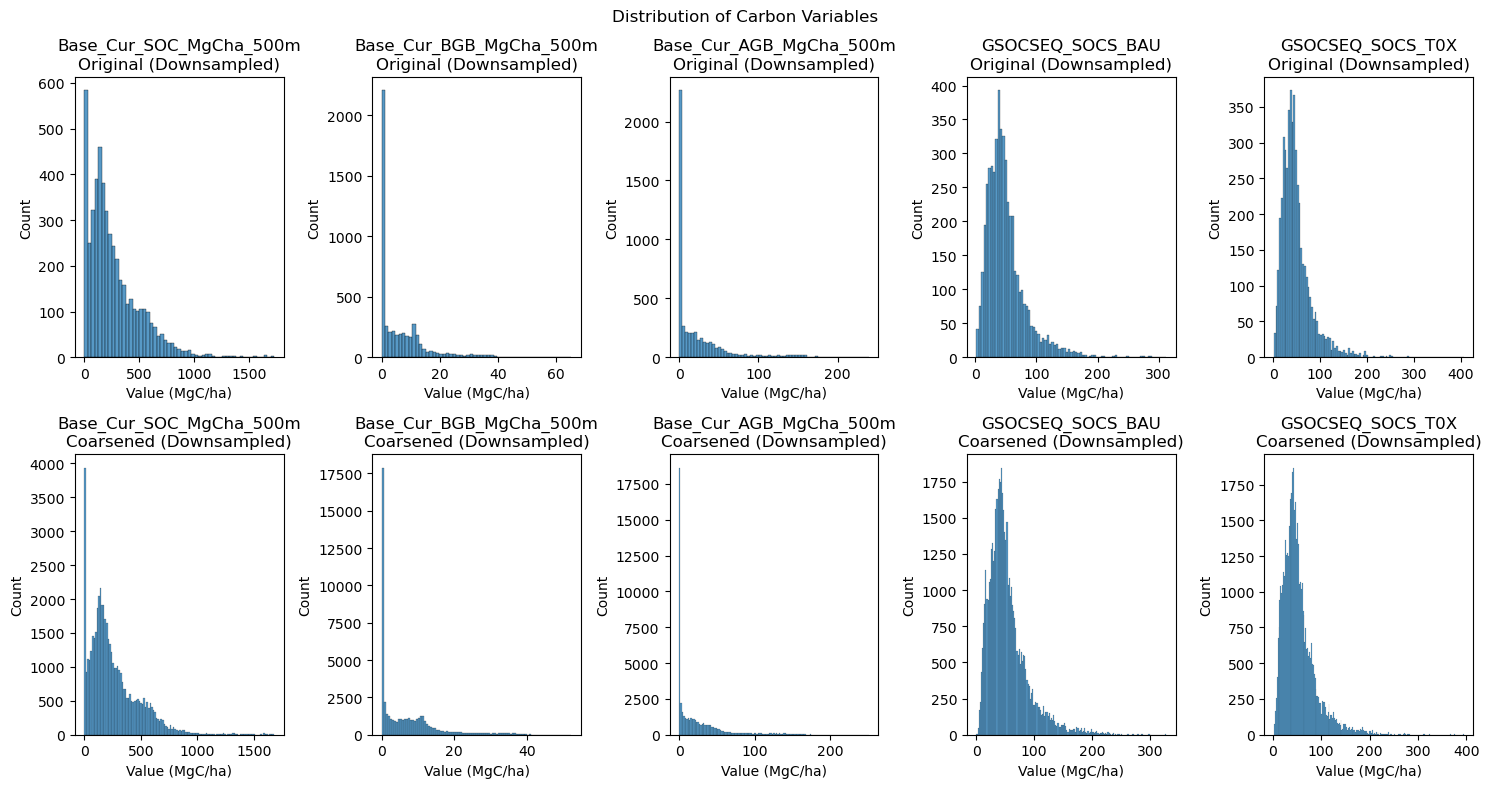

In [9]:
# Plot distribution of carbon variables with memory-efficient processing
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import dask.array as da

variables = ['Base_Cur_SOC_MgCha_500m', 'Base_Cur_BGB_MgCha_500m', 'Base_Cur_AGB_MgCha_500m', 'GSOCSEQ_SOCS_BAU', 'GSOCSEQ_SOCS_T0X']

# Create subplots for distributions
fig, axes = plt.subplots(2, len(variables), figsize=(15, 8))
fig.suptitle('Distribution of Carbon Variables')

for i, var in enumerate(variables):
    # Process data in smaller chunks with dask
    data = ds_carbon[var]
    
    # Downsample spatially first
    data = data.coarsen(lat=10, lon=10, boundary='trim').mean()
    
    # Convert to numpy array in chunks
    chunk_size = 1000  # Smaller chunk size
    sample_size = 50000  # Reduced sample size
    
    data_chunks = []
    for t in range(0, data.shape[0], chunk_size):
        chunk = data[t:t+chunk_size].values
        valid_data = chunk[~np.isnan(chunk)].flatten()
        if len(valid_data) > 0:
            # Take a small random sample from each chunk
            if len(valid_data) > sample_size//10:
                valid_data = np.random.choice(valid_data, size=sample_size//10, replace=False)
            data_chunks.append(valid_data)
        if len(np.concatenate(data_chunks)) >= sample_size:
            break
            
    if len(data_chunks) > 0:
        combined_data = np.concatenate(data_chunks)
        if len(combined_data) > sample_size:
            combined_data = np.random.choice(combined_data, size=sample_size, replace=False)
            
        # Plot original distribution
        sns.histplot(data=combined_data, ax=axes[0,i])
        axes[0,i].set_title(f'{var}\nOriginal (Downsampled)')
        axes[0,i].set_xlabel('Value (MgC/ha)')
        
        # Plot coarsened distribution
        coarse = data.coarsen(lat=10, lon=10).mean().values.flatten()
        coarse = coarse[~np.isnan(coarse)]
        if len(coarse) > sample_size:
            coarse = np.random.choice(coarse, size=sample_size, replace=False)
        
        sns.histplot(data=coarse, ax=axes[1,i])
        axes[1,i].set_title(f'{var}\nCoarsened (Downsampled)')
        axes[1,i].set_xlabel('Value (MgC/ha)')

plt.tight_layout()
plt.show()


In [2]:
from tqdm.auto import tqdm
import numpy as np
import pandas as pd




base_one_var = [
    'Base_Cur_AGB_MgCha_500m', 'Base_Cur_BGB_MgCha_500m', 'Base_Cur_SOC_MgCha_500m',
    'Base_Pot_AGB_MgCha_500m', 'Base_Pot_BGB_MgCha_500m', 'Base_Pot_SOC_MgCha_500m',
    'Base_Unr_SOC_MgCha_500m','Base_Unr_AGB_MgCha_500m', 'Base_Unr_BGB_MgCha_500m',
]
base_two_var = [
    'Base_Cur_AGB_BGB_MgCha_500m', 'Base_Pot_AGB_BGB_MgCha_500m', 'Base_Unr_AGB_BGB_MgCha_500m'
]
base_all_var = [
    'Base_Pot_AGB_BGB_SOC_MgCha_500m', 'Base_Unr_AGB_BGB_SOC_MgCha_500m', 'Base_Cur_AGB_BGB_SOC_MgCha_500m'
]
root_var = ['rmf_all_mosaic','shrub_rmf_mosaic','grass_rmf_mosaic','forest_rmf_mosaic']
rate_var = ['sequestration']
gsoil_var = ['GSOCSEQ_SOCS_BAU','GSOCSEQ_SOCS_T0X']


PERENNIAL_KEYWORDS = [
    'Alfalfa','Banana','Citrus','Cocoa','Coffee','Coconut',
    'Oil palm','Rubber','Sugarcane','Tea'
]

perennial_vars = [
    var for var in ds_carbon.data_vars
    if any(kw.lower() in var.lower() for kw in PERENNIAL_KEYWORDS)
]

print(f"自动识别多年生相关变量: {perennial_vars}")

all_vars= list(set(
    base_one_var + base_two_var + base_all_var + root_var + rate_var + gsoil_var + perennial_vars
))





def process_chunk(df_prediction, ds_merge, step,stop=0):

    # Get coordinates that exist in both df_temp and pv_df
    common_lats = np.intersect1d(ds_merge.lat.values, df_prediction['lat'].unique())
    common_lons = np.intersect1d(ds_merge.lon.values, df_prediction['lon'].unique())

    # Select data from df_temp using only the common coordinates
    ds_merge = ds_merge.sel(
        lat=common_lats,
        lon=common_lons,
    )

    #step = 500
    total_lat = len(ds_merge.lat)
    total_lon = len(ds_merge.lon)
    merged_dfs = []
    
    # Calculate total iterations for progress bar
    total_iterations = (total_lat // step + (1 if total_lat % step else 0)) * \
                    (total_lon // step + (1 if total_lon % step else 0))

    # Create progress bar with Chinese description
    pbar = tqdm(total=total_iterations, desc="处理数据块")

    # Iterate through all latitude and longitude points in chunks
    for start_lat in range(0, total_lat, step):
        end_lat = min(start_lat + step, total_lat)
        for start_lon in range(0, total_lon, step):
            end_lon = min(start_lon + step, total_lon)

            # Extract data from ds_merge for each time point
            df = ds_merge.isel(
                lat=slice(start_lat, end_lat),
                lon=slice(start_lon, end_lon)
            ).compute().to_dataframe()
            
            # Reset index to convert multi-index to columns
            df = df.reset_index()
            
            # Merge with pv_df based on lat/lon coordinates
            chunk_merged = pd.merge(df, df_prediction, on=['lat','lon','time'], how='inner')
            merged_dfs.append(chunk_merged)
            
            # Update progress bar
            pbar.update(1)
            if stop==1:
                break
    # Close progress bar
    pbar.close()
    # Combine all chunks into final dataframe
    merged_df = pd.concat(merged_dfs, ignore_index=True)
    return merged_df

def enrich_prediction_with_vars(df_prediction, ds_carbon, var_list, time_sel='2020-01-01', step=3000):
    """
    将ds_carbon中所有var_list变量在指定time_sel下批量合成进df_prediction
    返回合并后新DataFrame（行数与df_prediction一致，列包含原有+所有var_list变量）
    """
    dfs = [df_prediction]
    for var in var_list:
        print(f"Processing variable: {var}")
        # 提取单变量并与df_prediction合并
        arr = ds_carbon[var].sel(time=[time_sel]) if 'time' in ds_carbon[var].dims else ds_carbon[var]
        df_var = process_chunk(df_prediction, arr, step=step)
        # 只保留关键列防止冗余
        if var not in df_prediction.columns:
            df_var = df_var[['lat','lon','time',var]]
        dfs.append(df_var)
    # 顺次合并所有变量（按lat/lon/time合并）
    from functools import reduce
    df_all = reduce(lambda left, right: pd.merge(left, right, on=['lat','lon','time'], how='outer'), dfs)
    return df_all



# 1. 先将变量批量合成到 df_prediction_new
df_prediction['time'] = pd.to_datetime(df_prediction['time'])
df_prediction_new = enrich_prediction_with_vars(
    df_prediction,
    ds_carbon,
    all_vars,
    time_sel='2020-01-01',
    step=3000
)


# # Iterate through each variable
# # Get all variables from ds_merge



# merged_dfs = []

# df_prediction['time'] = pd.to_datetime(df_prediction['time'])

# # Iterate through each variable
# for i, var in enumerate(all_vars):
#     print(f"Processing variable {i+1} of {len(all_vars)}: {var}")
#     if var=='sequestration':
#     # Check if variable has time dimension
#         df_temp = ds_carbon[var].sel(time=['2020-01-01'])

#         # Process the chunk and merge with pv_df
#         merged_df = process_chunk(df_prediction, df_temp, step=3000)

#         merged_dfs.append(merged_df)

# Concatenate all merged dataframes with single-column retention

# final_merged_df = merged_dfs[0]
# for df in tqdm(merged_dfs[1:], desc="合并数据"):

#     final_merged_df = pd.merge(
#         final_merged_df,
#         df,
#         on=["time", "lon", "lat"],
#         how="inner",
#         suffixes=("", "_drop")
#     )
#     # Drop duplicated columns with "_drop" suffix
#     final_merged_df = final_merged_df.loc[:, ~final_merged_df.columns.str.endswith("_drop")]



自动识别多年生相关变量: ['Alfalfa_1981-2010_Historical_With CO2 Fertilization', 'Banana_1981-2010_Historical_With CO2 Fertilization', 'Citrus_1981-2010_Historical_With CO2 Fertilization', 'Cocoa_1981-2010_Historical_With CO2 Fertilization', 'Coconut_1981-2010_Historical_With CO2 Fertilization', 'Coffee_1981-2010_Historical_With CO2 Fertilization', 'Oil palm_1981-2010_Historical_With CO2 Fertilization', 'Rubber_1981-2010_Historical_With CO2 Fertilization', 'Sugarcane_1981-2010_Historical_With CO2 Fertilization', 'Tea_1981-2010_Historical_With CO2 Fertilization']
Processing variable: grass_rmf_mosaic


处理数据块:   0%|          | 0/3 [00:00<?, ?it/s]

Processing variable: Base_Pot_AGB_BGB_MgCha_500m


处理数据块:   0%|          | 0/3 [00:00<?, ?it/s]

Processing variable: Base_Unr_SOC_MgCha_500m


处理数据块:   0%|          | 0/3 [00:00<?, ?it/s]

Processing variable: Base_Unr_AGB_BGB_MgCha_500m


处理数据块:   0%|          | 0/3 [00:00<?, ?it/s]

Processing variable: Base_Cur_AGB_BGB_SOC_MgCha_500m


处理数据块:   0%|          | 0/3 [00:00<?, ?it/s]

Processing variable: shrub_rmf_mosaic


处理数据块:   0%|          | 0/3 [00:00<?, ?it/s]

Processing variable: Base_Pot_AGB_BGB_SOC_MgCha_500m


处理数据块:   0%|          | 0/3 [00:00<?, ?it/s]

Processing variable: Sugarcane_1981-2010_Historical_With CO2 Fertilization


处理数据块:   0%|          | 0/3 [00:00<?, ?it/s]

Processing variable: Rubber_1981-2010_Historical_With CO2 Fertilization


处理数据块:   0%|          | 0/3 [00:00<?, ?it/s]

Processing variable: Base_Pot_AGB_MgCha_500m


处理数据块:   0%|          | 0/3 [00:00<?, ?it/s]

Processing variable: Base_Unr_AGB_BGB_SOC_MgCha_500m


处理数据块:   0%|          | 0/3 [00:00<?, ?it/s]

Processing variable: Banana_1981-2010_Historical_With CO2 Fertilization


处理数据块:   0%|          | 0/3 [00:00<?, ?it/s]

Processing variable: Base_Cur_SOC_MgCha_500m


处理数据块:   0%|          | 0/3 [00:00<?, ?it/s]

Processing variable: Base_Pot_SOC_MgCha_500m


处理数据块:   0%|          | 0/3 [00:00<?, ?it/s]

Processing variable: forest_rmf_mosaic


处理数据块:   0%|          | 0/3 [00:00<?, ?it/s]

Processing variable: Alfalfa_1981-2010_Historical_With CO2 Fertilization


处理数据块:   0%|          | 0/3 [00:00<?, ?it/s]

Processing variable: GSOCSEQ_SOCS_BAU


处理数据块:   0%|          | 0/3 [00:00<?, ?it/s]

Processing variable: Base_Cur_AGB_BGB_MgCha_500m


处理数据块:   0%|          | 0/3 [00:00<?, ?it/s]

Processing variable: Coffee_1981-2010_Historical_With CO2 Fertilization


处理数据块:   0%|          | 0/3 [00:00<?, ?it/s]

Processing variable: Base_Cur_AGB_MgCha_500m


处理数据块:   0%|          | 0/3 [00:00<?, ?it/s]

Processing variable: GSOCSEQ_SOCS_T0X


处理数据块:   0%|          | 0/3 [00:00<?, ?it/s]

Processing variable: Coconut_1981-2010_Historical_With CO2 Fertilization


处理数据块:   0%|          | 0/3 [00:00<?, ?it/s]

Processing variable: Base_Cur_BGB_MgCha_500m


处理数据块:   0%|          | 0/3 [00:00<?, ?it/s]

Processing variable: Base_Pot_BGB_MgCha_500m


处理数据块:   0%|          | 0/3 [00:00<?, ?it/s]

Processing variable: rmf_all_mosaic


处理数据块:   0%|          | 0/3 [00:00<?, ?it/s]

Processing variable: Oil palm_1981-2010_Historical_With CO2 Fertilization


处理数据块:   0%|          | 0/3 [00:00<?, ?it/s]

Processing variable: Cocoa_1981-2010_Historical_With CO2 Fertilization


处理数据块:   0%|          | 0/3 [00:00<?, ?it/s]

Processing variable: Base_Unr_AGB_MgCha_500m


处理数据块:   0%|          | 0/3 [00:00<?, ?it/s]

Processing variable: Base_Unr_BGB_MgCha_500m


处理数据块:   0%|          | 0/3 [00:00<?, ?it/s]

Processing variable: Citrus_1981-2010_Historical_With CO2 Fertilization


处理数据块:   0%|          | 0/3 [00:00<?, ?it/s]

Processing variable: sequestration


处理数据块:   0%|          | 0/3 [00:00<?, ?it/s]

Processing variable: Tea_1981-2010_Historical_With CO2 Fertilization


处理数据块:   0%|          | 0/3 [00:00<?, ?it/s]

## 3.5.2 三种策略期望碳汇计算

In [3]:
df_prediction_fill=fill_nonpositive_with_nearest(df_prediction_new,target_cols=all_vars)

# # Plot histograms for each variable in all_vars
# import matplotlib.pyplot as plt

# fig, axes = plt.subplots(len(all_vars), 1, figsize=(10, 4*len(all_vars)))
# fig.tight_layout(pad=3.0)

# for i, var in enumerate(all_vars):
#     axes[i].hist(df_prediction_fill[var].dropna(), bins=50)
#     axes[i].set_title(f'Distribution of {var}')
#     axes[i].set_xlabel('Value')
#     axes[i].set_ylabel('Count')

# plt.show()

列 Sugarcane_1981-2010_Historical_With CO2 Fertilization 没有需要填充的非正值或NaN值
列 Rubber_1981-2010_Historical_With CO2 Fertilization 没有需要填充的非正值或NaN值
列 Banana_1981-2010_Historical_With CO2 Fertilization 没有需要填充的非正值或NaN值
列 Alfalfa_1981-2010_Historical_With CO2 Fertilization 没有需要填充的非正值或NaN值
列 Coffee_1981-2010_Historical_With CO2 Fertilization 没有需要填充的非正值或NaN值
列 Coconut_1981-2010_Historical_With CO2 Fertilization 没有需要填充的非正值或NaN值
列 Oil palm_1981-2010_Historical_With CO2 Fertilization 没有需要填充的非正值或NaN值
列 Cocoa_1981-2010_Historical_With CO2 Fertilization 没有需要填充的非正值或NaN值
列 Citrus_1981-2010_Historical_With CO2 Fertilization 没有需要填充的非正值或NaN值
列 Tea_1981-2010_Historical_With CO2 Fertilization 没有需要填充的非正值或NaN值


In [10]:
import numpy as np
import pandas as pd


YEARS = 30
DWCI_FOREST = 0.10
DWCI_AGRO = 0.02
DWCI_VEG = 0.04

PERENNIAL_KEYWORDS = [
    'Alfalfa','Banana','Citrus','Cocoa','Coffee','Coconut',
    'Oil palm','Rubber','Sugarcane','Tea'
]

def get_perennial_mask(df):
    mask = pd.Series(False, index=df.index)
    for col in df.columns:
        if any(kw in col for kw in PERENNIAL_KEYWORDS):
            mask |= df[col].isin([1, 2])
    return mask

def compute_all_strategies(df):
    df = df.copy()

    # 计算2020年基线碳储量
    agb = df['Base_Cur_AGB_MgCha_500m']
    bgb = agb * df['forest_rmf_mosaic'] * 0.01
    soc = df['Base_Cur_SOC_MgCha_500m']
    
    # 森林策略基线（2020年）
    cur_forest = agb + bgb + soc + agb * DWCI_FOREST
    
    # 农业策略基线（2020年）
    per_mask = get_perennial_mask(df)
    cur_agro_bio = np.where(per_mask, agb * (1 + df['forest_rmf_mosaic'] * 0.01 + DWCI_AGRO), 0)
    cur_agro = soc + cur_agro_bio
    
    # 植被策略基线（2020年）
    cur_veg_bio = agb * np.where(
        df['landcover'].isin([3, 4]),
        1 + DWCI_VEG + df['shrub_rmf_mosaic'] * 0.01,
        1 + DWCI_VEG + df['grass_rmf_mosaic'] * 0.01
    )
    cur_veg = soc + cur_veg_bio

    # 森林策略 Forest ：AGB + BGB + SOC + 增量
    # （注释部分采用现状+增量累积，现在仅计算增量）
    # 
    # df['acc_forest'] = cur_forest + df['sequestration'] * YEARS * (1 + DWCI_FOREST + df['forest_rmf_mosaic'] * 0.01) + df['Base_Unr_SOC_MgCha_500m']
    df['acc_forest'] = df['sequestration'] * YEARS * (1 + DWCI_FOREST + df['forest_rmf_mosaic'] * 0.01) + df['Base_Pot_SOC_MgCha_500m']
    df['cap_forest'] = df['Base_Pot_AGB_BGB_SOC_MgCha_500m'] + DWCI_FOREST * df['Base_Pot_AGB_MgCha_500m']
    df['final_forest'] = np.minimum(df['acc_forest'], df['cap_forest'])
    
    # 农业策略 Agriculture
    ratio = df['GSOCSEQ_SOCS_BAU'] / df['GSOCSEQ_SOCS_T0X']
    r_annual = ratio ** (1/20) - 1 
    r_total = (1 + r_annual) ** YEARS 
    df['acc_soc_agro'] = df['Base_Cur_SOC_MgCha_500m'] * r_total 
    df['acc_perennial'] = 0.0
    df.loc[per_mask, 'acc_perennial'] = (
        agb[per_mask] * (1 + df.loc[per_mask, 'forest_rmf_mosaic'] * 0.01 + DWCI_AGRO) 
    )
    df['acc_agro'] = df['acc_soc_agro'] + df['acc_perennial']
    cap_per = df['Base_Pot_AGB_BGB_SOC_MgCha_500m'] * (1 + DWCI_AGRO)
    df['cap_agro'] = df['Base_Pot_SOC_MgCha_500m'] + cap_per.where(per_mask, 0)
    df['final_agro'] = np.minimum(df['acc_agro'], df['cap_agro'])

    # 植被策略 Vegetation 
    df['acc_soc_veg'] = df['Base_Cur_SOC_MgCha_500m'] * r_total
    df['acc_bio_veg'] = df['Base_Cur_AGB_MgCha_500m'] * np.where(
        df['landcover'].isin([3, 4]),
        1 + DWCI_VEG + df['shrub_rmf_mosaic'] * 0.01,
        1 + DWCI_VEG + df['grass_rmf_mosaic'] * 0.01
    )
    df['acc_veg'] = df['acc_soc_veg'] + df['acc_bio_veg']
    df['cap_veg'] = df['Base_Pot_AGB_BGB_SOC_MgCha_500m']
    df['final_veg'] = np.minimum(df['acc_veg'], df['cap_veg'])

    # 计算增量碳汇 (2020-2050年期间的净增加量)
    df['baseline_forest'] = cur_forest
    df['baseline_agro'] = cur_agro  
    df['baseline_veg'] = cur_veg
    
    # 30年期间的增量碳汇
    df['increment_forest'] = df['final_forest'] - df['baseline_forest']
    df['increment_agro'] = df['final_agro'] - df['baseline_agro']
    df['increment_veg'] = df['final_veg'] - df['baseline_veg']
    
    # 保留原始增量值（包括负值）
    return df

# ------------------ 示例调用 ------------------

# 2. 计算三种策略所有像元的累计碳汇和上限，并取“双重约束”最终值
df_strategies = compute_all_strategies(df_prediction_fill)

# 3. 结果df_strategies中每行像元含：acc_forest, cap_forest, final_forest,
#    acc_agro, cap_agro, final_agro, acc_veg, cap_veg, final_veg
#    可按需做区域/策略汇总、导出等
df_strategies.to_csv('data/4.1 Restoration_strategy_data.csv', index=False)


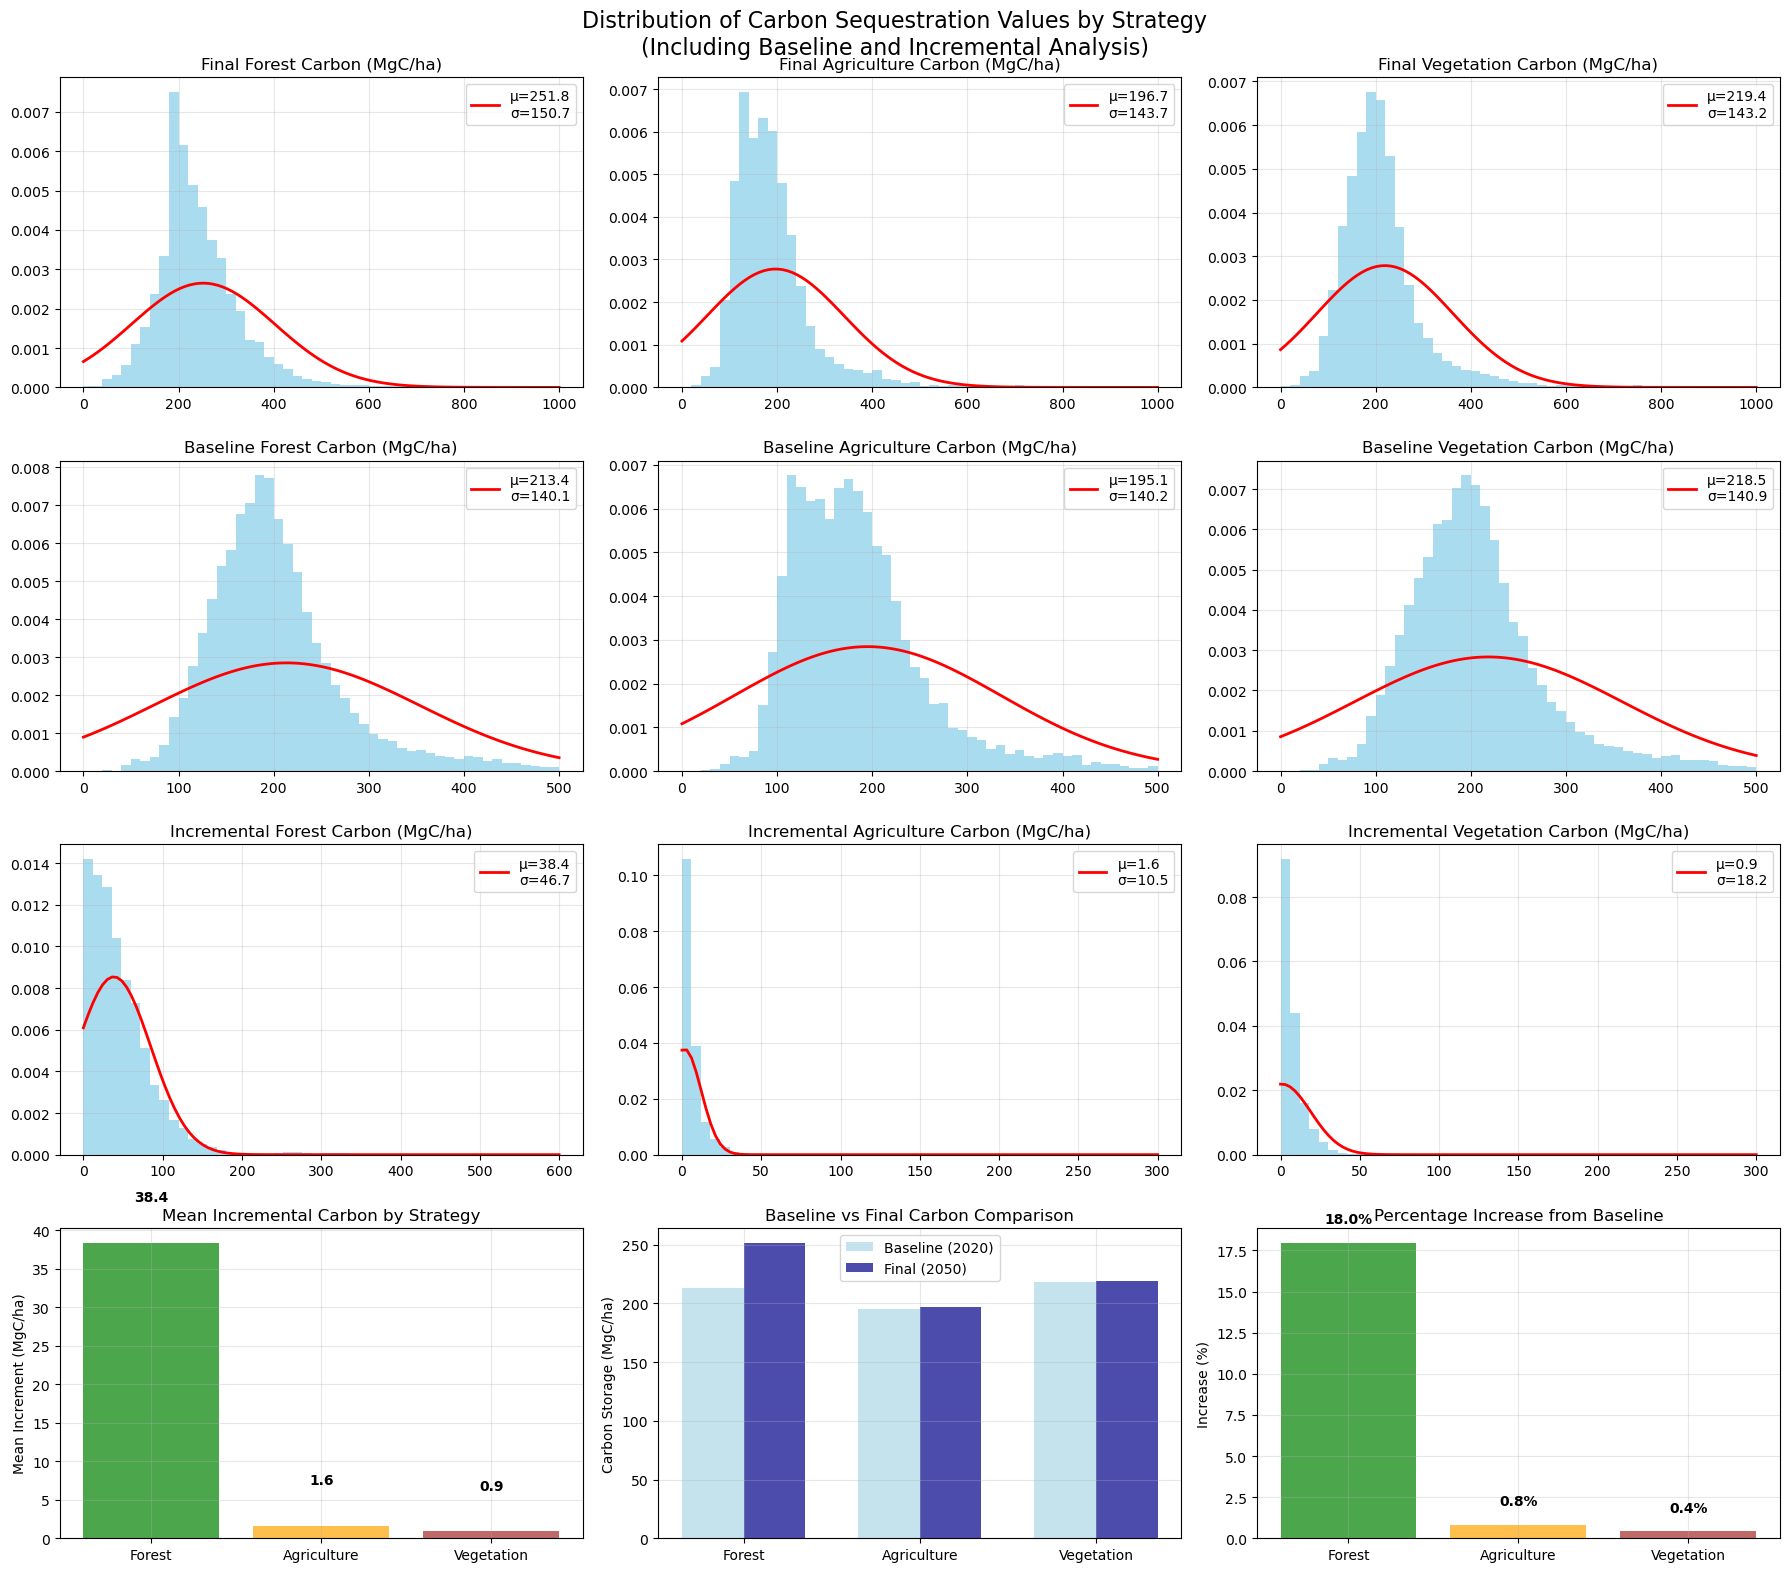


Creating spatial distribution maps for incremental carbon...


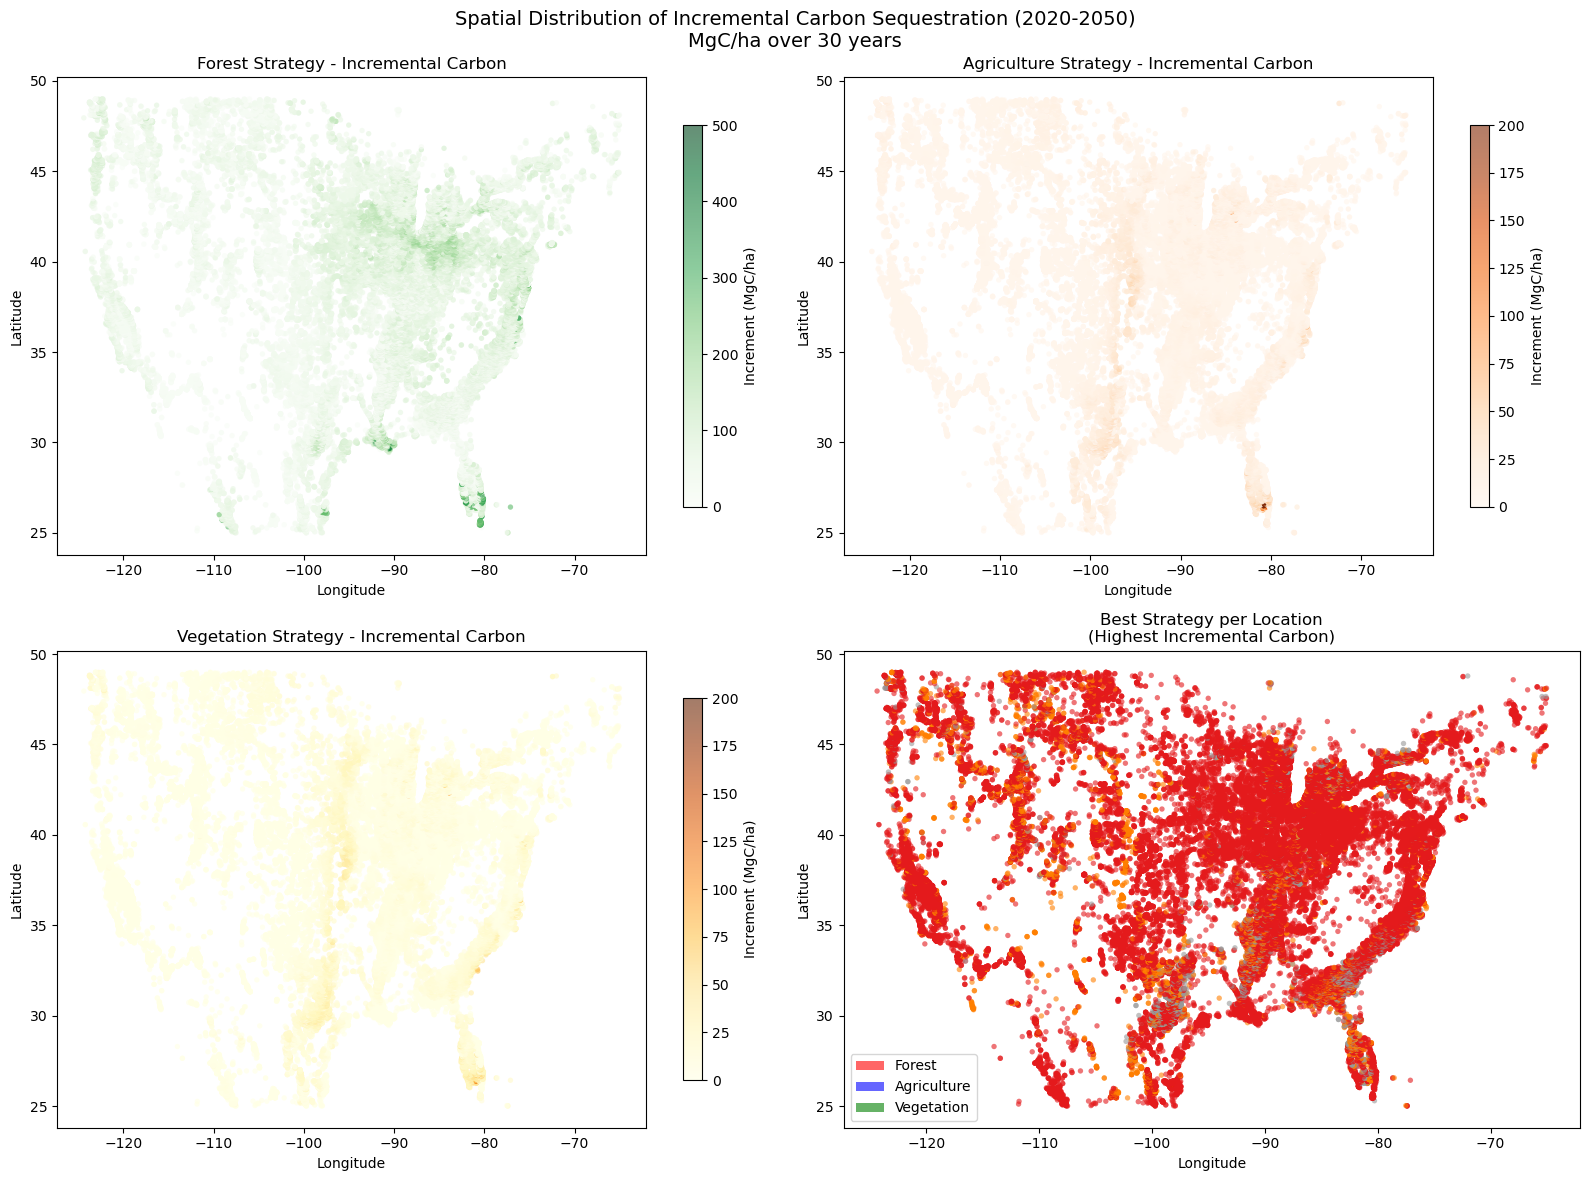


INCREMENTAL CARBON SEQUESTRATION SUMMARY (2020-2050)
      Strategy  Mean_Baseline_MgC_ha  Mean_Final_MgC_ha  \
0       Forest            213.440002             251.82   
1  Agriculture            195.119995             196.72   
2   Vegetation            218.479996             219.39   

   Mean_Increment_MgC_ha  Total_Increment_Gt  Std_Increment_MgC_ha  
0                  38.37              189.70                 46.68  
1                   1.60                7.90                 10.55  
2                   0.91                4.48                 18.20  

Updated DataFrame contains 70312 rows with the following key columns:
  ✓ lat
  ✓ lon
  ✓ baseline_forest
  ✓ baseline_agro
  ✓ baseline_veg
  ✓ final_forest
  ✓ final_agro
  ✓ final_veg
  ✓ increment_forest
  ✓ increment_agro
  ✓ increment_veg

Data saved to: data/4.1 Restoration_strategy_data.csv


In [11]:
# ... existing code ...

# Create enhanced histograms including baseline and increment analysis
import matplotlib.pyplot as plt
from scipy.stats import norm

fig, axes = plt.subplots(4, 3, figsize=(18, 16))
fig.suptitle('Distribution of Carbon Sequestration Values by Strategy\n(Including Baseline and Incremental Analysis)', fontsize=16)

def plot_hist_with_gaussian(data, ax, title, bins=50, range=None):
    # Filter out infinite and NaN values
    data_clean = data[np.isfinite(data)]
    if len(data_clean) == 0:
        ax.text(0.5, 0.5, 'No valid data', ha='center', va='center', transform=ax.transAxes)
        ax.set_title(title)
        return
    
    if range is None:
        range = (data_clean.min(), data_clean.max())
    
    # Plot histogram
    counts, bins, _ = ax.hist(data_clean, bins=bins, range=range, density=True, alpha=0.7, color='skyblue')
    
    # Fit Gaussian
    mu, sigma = norm.fit(data_clean)
    x = np.linspace(range[0], range[1], 100)
    y = norm.pdf(x, mu, sigma)
    
    # Plot Gaussian fit
    ax.plot(x, y, 'r-', lw=2, label=f'μ={mu:.1f}\nσ={sigma:.1f}')
    ax.set_title(title)
    ax.legend()
    ax.grid(True, alpha=0.3)

# Row 1: Final carbon values (existing)
plot_hist_with_gaussian(df_strategies['final_forest'], axes[0,0], 'Final Forest Carbon (MgC/ha)', range=(0,1000))
plot_hist_with_gaussian(df_strategies['final_agro'], axes[0,1], 'Final Agriculture Carbon (MgC/ha)', range=(0,1000))
plot_hist_with_gaussian(df_strategies['final_veg'], axes[0,2], 'Final Vegetation Carbon (MgC/ha)', range=(0,1000))

# Row 2: Baseline carbon values (new)
plot_hist_with_gaussian(df_strategies['baseline_forest'], axes[1,0], 'Baseline Forest Carbon (MgC/ha)', range=(0,500))
plot_hist_with_gaussian(df_strategies['baseline_agro'], axes[1,1], 'Baseline Agriculture Carbon (MgC/ha)', range=(0,500))
plot_hist_with_gaussian(df_strategies['baseline_veg'], axes[1,2], 'Baseline Vegetation Carbon (MgC/ha)', range=(0,500))

# Row 3: Incremental carbon values (new)
plot_hist_with_gaussian(df_strategies['increment_forest'], axes[2,0], 'Incremental Forest Carbon (MgC/ha)', range=(0,600))
plot_hist_with_gaussian(df_strategies['increment_agro'], axes[2,1], 'Incremental Agriculture Carbon (MgC/ha)', range=(0,300))
plot_hist_with_gaussian(df_strategies['increment_veg'], axes[2,2], 'Incremental Vegetation Carbon (MgC/ha)', range=(0,300))

# Row 4: Comparative analysis (new)
# Comparison of incremental values across strategies
ax = axes[3,0]
strategies = ['Forest', 'Agriculture', 'Vegetation']
increments = [df_strategies['increment_forest'].mean(), 
              df_strategies['increment_agro'].mean(), 
              df_strategies['increment_veg'].mean()]
colors = ['green', 'orange', 'brown']
bars = ax.bar(strategies, increments, color=colors, alpha=0.7)
ax.set_title('Mean Incremental Carbon by Strategy')
ax.set_ylabel('Mean Increment (MgC/ha)')
ax.grid(True, alpha=0.3)
for bar, val in zip(bars, increments):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
            f'{val:.1f}', ha='center', va='bottom', fontweight='bold')

# Baseline vs Final comparison
ax = axes[3,1]
baselines = [df_strategies['baseline_forest'].mean(),
             df_strategies['baseline_agro'].mean(), 
             df_strategies['baseline_veg'].mean()]
finals = [df_strategies['final_forest'].mean(),
          df_strategies['final_agro'].mean(),
          df_strategies['final_veg'].mean()]

x = np.arange(len(strategies))
width = 0.35
ax.bar(x - width/2, baselines, width, label='Baseline (2020)', color='lightblue', alpha=0.7)
ax.bar(x + width/2, finals, width, label='Final (2050)', color='darkblue', alpha=0.7)
ax.set_title('Baseline vs Final Carbon Comparison')
ax.set_ylabel('Carbon Storage (MgC/ha)')
ax.set_xticks(x)
ax.set_xticklabels(strategies)
ax.legend()
ax.grid(True, alpha=0.3)

# Percentage increase analysis
ax = axes[3,2]
pct_increases = []
for i, strategy in enumerate(['forest', 'agro', 'veg']):
    baseline_col = f'baseline_{strategy}'
    final_col = f'final_{strategy}'
    baseline_mean = df_strategies[baseline_col].mean()
    final_mean = df_strategies[final_col].mean()
    if baseline_mean > 0:
        pct_increase = ((final_mean - baseline_mean) / baseline_mean) * 100
    else:
        pct_increase = 0
    pct_increases.append(pct_increase)

bars = ax.bar(strategies, pct_increases, color=colors, alpha=0.7)
ax.set_title('Percentage Increase from Baseline')
ax.set_ylabel('Increase (%)')
ax.grid(True, alpha=0.3)
for bar, val in zip(bars, pct_increases):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
            f'{val:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Create spatial distribution maps for incremental carbon
print("\nCreating spatial distribution maps for incremental carbon...")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Spatial Distribution of Incremental Carbon Sequestration (2020-2050)\nMgC/ha over 30 years', fontsize=14)

# Reset index to get lat/lon as columns
df_spatial = df_strategies.reset_index() if 'lat' in df_strategies.index.names else df_strategies

# Forest increment
scatter1 = axes[0,0].scatter(df_spatial['lon'], df_spatial['lat'], 
                            c=df_spatial['increment_forest'], cmap='Greens', 
                            s=15, alpha=0.6, edgecolors='none', vmin=0, vmax=500)
axes[0,0].set_title('Forest Strategy - Incremental Carbon')
axes[0,0].set_xlabel('Longitude')
axes[0,0].set_ylabel('Latitude')
cbar1 = plt.colorbar(scatter1, ax=axes[0,0], shrink=0.8)
cbar1.set_label('Increment (MgC/ha)')

# Agriculture increment
scatter2 = axes[0,1].scatter(df_spatial['lon'], df_spatial['lat'], 
                            c=df_spatial['increment_agro'], cmap='Oranges', 
                            s=15, alpha=0.6, edgecolors='none', vmin=0, vmax=200)
axes[0,1].set_title('Agriculture Strategy - Incremental Carbon')
axes[0,1].set_xlabel('Longitude')
axes[0,1].set_ylabel('Latitude')
cbar2 = plt.colorbar(scatter2, ax=axes[0,1], shrink=0.8)
cbar2.set_label('Increment (MgC/ha)')

# Vegetation increment
scatter3 = axes[1,0].scatter(df_spatial['lon'], df_spatial['lat'], 
                            c=df_spatial['increment_veg'], cmap='YlOrBr', 
                            s=15, alpha=0.6, edgecolors='none', vmin=0, vmax=200)
axes[1,0].set_title('Vegetation Strategy - Incremental Carbon')
axes[1,0].set_xlabel('Longitude')
axes[1,0].set_ylabel('Latitude')
cbar3 = plt.colorbar(scatter3, ax=axes[1,0], shrink=0.8)
cbar3.set_label('Increment (MgC/ha)')

# Best strategy per pixel (highest increment)
increment_cols = ['increment_forest', 'increment_agro', 'increment_veg']
best_strategy = df_strategies[increment_cols].idxmax(axis=1)
best_values = df_strategies[increment_cols].max(axis=1)

# Create color map for strategies
strategy_colors = {'increment_forest': 0, 'increment_agro': 1, 'increment_veg': 2}
strategy_color_values = [strategy_colors[s] for s in best_strategy]

scatter4 = axes[1,1].scatter(df_spatial['lon'], df_spatial['lat'], 
                            c=strategy_color_values, cmap='Set1', 
                            s=15, alpha=0.6, edgecolors='none')
axes[1,1].set_title('Best Strategy per Location\n(Highest Incremental Carbon)')
axes[1,1].set_xlabel('Longitude')
axes[1,1].set_ylabel('Latitude')

# Create custom legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='red', alpha=0.6, label='Forest'),
                  Patch(facecolor='blue', alpha=0.6, label='Agriculture'),
                  Patch(facecolor='green', alpha=0.6, label='Vegetation')]
axes[1,1].legend(handles=legend_elements, loc='best')

plt.tight_layout()
plt.show()

# Summary statistics table
print("\n" + "="*80)
print("INCREMENTAL CARBON SEQUESTRATION SUMMARY (2020-2050)")
print("="*80)

summary_stats = pd.DataFrame({
    'Strategy': ['Forest', 'Agriculture', 'Vegetation'],
    'Mean_Baseline_MgC_ha': [df_strategies['baseline_forest'].mean(),
                            df_strategies['baseline_agro'].mean(),
                            df_strategies['baseline_veg'].mean()],
    'Mean_Final_MgC_ha': [df_strategies['final_forest'].mean(),
                         df_strategies['final_agro'].mean(),
                         df_strategies['final_veg'].mean()],
    'Mean_Increment_MgC_ha': [df_strategies['increment_forest'].mean(),
                             df_strategies['increment_agro'].mean(),
                             df_strategies['increment_veg'].mean()],
    'Total_Increment_Gt': [df_strategies['increment_forest'].sum() * df_strategies.shape[0] / 1e9,
                          df_strategies['increment_agro'].sum() * df_strategies.shape[0] / 1e9,
                          df_strategies['increment_veg'].sum() * df_strategies.shape[0] / 1e9],
    'Std_Increment_MgC_ha': [df_strategies['increment_forest'].std(),
                            df_strategies['increment_agro'].std(),
                            df_strategies['increment_veg'].std()]
})

print(summary_stats.round(2))

# Also display the updated dataframe structure
print(f"\nUpdated DataFrame contains {len(df_strategies)} rows with the following key columns:")
key_columns = ['lat', 'lon', 'baseline_forest', 'baseline_agro', 'baseline_veg',
               'final_forest', 'final_agro', 'final_veg',
               'increment_forest', 'increment_agro', 'increment_veg']

for col in key_columns:
    if col in df_strategies.columns:
        print(f"  ✓ {col}")
    elif col in df_strategies.index.names:
        print(f"  ✓ {col} (index)")
    else:
        print(f"  ✗ {col} (missing)")

print(f"\nData saved to: data/4.1 Restoration_strategy_data.csv")

## 3.6  与光伏策略效益对比

In [12]:
# 计算不同策略概率
df_strategies['weighted_density_Forest'] = df_strategies['weighted_density_2'] + df_strategies['weighted_density_6']  # Forest
df_strategies['weighted_density_Agricultural'] = df_strategies['weighted_density_1'] + df_strategies['weighted_density_5']   # Agricultural
df_strategies['weighted_density_Vegetation'] = df_strategies['weighted_density_3'] + df_strategies['weighted_density_4'] + df_strategies['weighted_density_7'] +df_strategies['weighted_density_8'] + df_strategies['weighted_density_9']  # Othe

# 计算光伏的固碳潜力因子，这里注意0.86是当时随便加的，后面没有采用
df_strategies['pv_potential_dens'] = df_strategies['carbon_emission (t)/yr'] * 30  * 0.27 / ( df_prediction_new['area_m2']  / 10000 ) 

df_strategies['Expectation_net_benefit'] = (df_strategies['pv_potential_dens'] 
                                          - df_strategies['final_forest'] * df_strategies['weighted_density_Forest'] 
                                          - df_strategies['final_agro'] * df_strategies['weighted_density_Agricultural'] 
                                          - df_strategies['final_veg'] * df_strategies['weighted_density_Vegetation'])
df_strategies['Revenue_ratio'] = df_strategies['pv_potential_dens'] / (df_strategies['final_forest'] * df_strategies['weighted_density_Forest'] 
                                          + df_strategies['final_agro'] * df_strategies['weighted_density_Agricultural'] 
                                          + df_strategies['final_veg'] * df_strategies['weighted_density_Vegetation'])

# Create data directory if it doesn't exist
import os
os.makedirs('data', exist_ok=True)

df_strategies[['lat','lon','time','acc_forest','cap_forest','final_forest', 'weighted_density_Forest','weighted_density_Agricultural','weighted_density_Vegetation',
               'acc_agro','cap_agro','final_agro', 
                'acc_veg' ,'cap_veg','final_veg','env_scores', 'pv_potential_dens','Expectation_net_benefit','Revenue_ratio']].to_csv('data/4.df_strategies.csv',index=False)


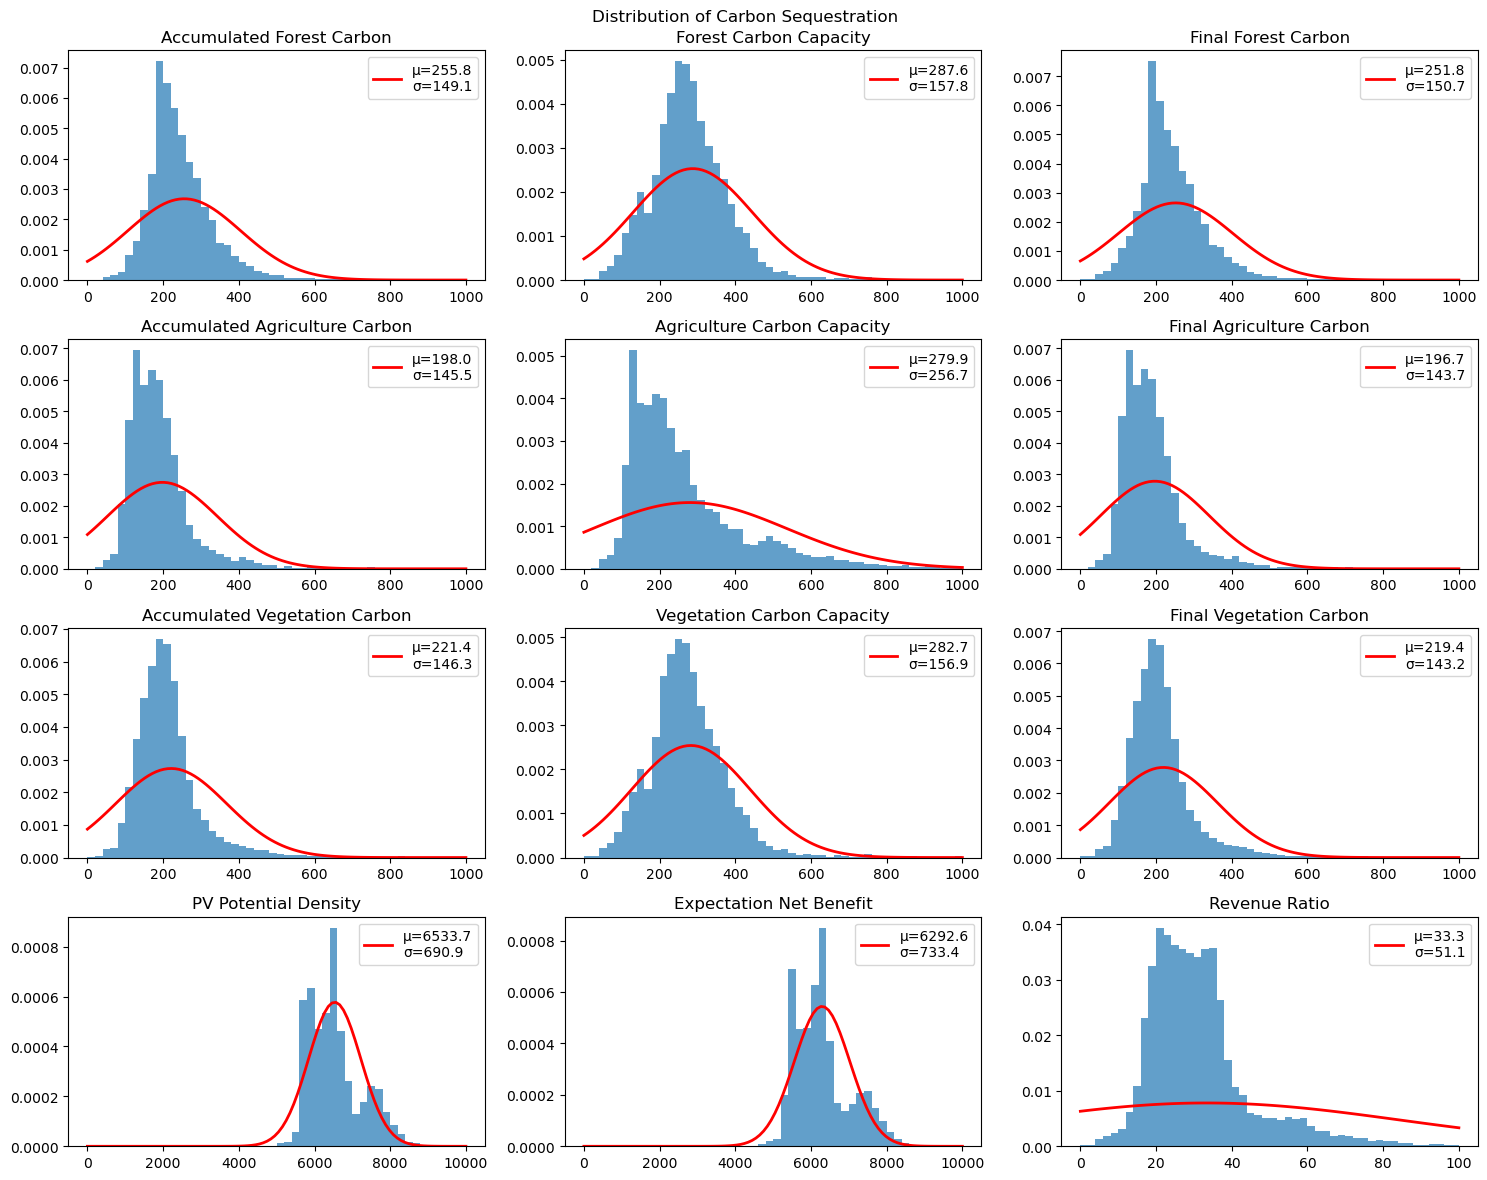

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
import matplotlib.ticker as mtick
plt.rcParams["font.family"] = "DejaVu Sans"   # 避免中文标题乱码

fig, axes = plt.subplots(4, 3, figsize=(15, 12))
fig.suptitle('Distribution of Carbon Sequestration')



def plot_hist_with_gaussian(data, ax, title, bins=50, range=(0,1000)):
    # Plot histogram
    counts, bins, _ = ax.hist(data, bins=bins, range=range, density=True, alpha=0.7)
    
    # Fit Gaussian
    mu, sigma = norm.fit(data)
    x = np.linspace(range[0], range[1], 100)
    y = norm.pdf(x, mu, sigma)
    
    # Plot Gaussian fit
    ax.plot(x, y, 'r-', lw=2, label=f'μ={mu:.1f}\nσ={sigma:.1f}')
    ax.set_title(title)
    ax.legend()

# Forest strategy distributions
plot_hist_with_gaussian(df_strategies['acc_forest'], axes[0,0], 'Accumulated Forest Carbon')
plot_hist_with_gaussian(df_strategies['cap_forest'], axes[0,1], 'Forest Carbon Capacity')
plot_hist_with_gaussian(df_strategies['final_forest'], axes[0,2], 'Final Forest Carbon')

# Agriculture strategy distributions
plot_hist_with_gaussian(df_strategies['acc_agro'], axes[1,0], 'Accumulated Agriculture Carbon')
plot_hist_with_gaussian(df_strategies['cap_agro'], axes[1,1], 'Agriculture Carbon Capacity')
plot_hist_with_gaussian(df_strategies['final_agro'], axes[1,2], 'Final Agriculture Carbon')

# Vegetation strategy distributions
plot_hist_with_gaussian(df_strategies['acc_veg'], axes[2,0], 'Accumulated Vegetation Carbon')
plot_hist_with_gaussian(df_strategies['cap_veg'], axes[2,1], 'Vegetation Carbon Capacity')
plot_hist_with_gaussian(df_strategies['final_veg'], axes[2,2], 'Final Vegetation Carbon')

# PV strategy distributions
plot_hist_with_gaussian(df_strategies['pv_potential_dens'], axes[3,0], 'PV Potential Density',range=(0,10000))
plot_hist_with_gaussian(df_strategies['Expectation_net_benefit'], axes[3,1], 'Expectation Net Benefit',range=(0,10000))
plot_hist_with_gaussian(df_strategies['Revenue_ratio'], axes[3,2], 'Revenue Ratio',range=(0,100))


plt.tight_layout()
plt.show()


## 3.7 下一步计划 


已经有一些文献对比分析了PV与森林碳汇碳NCS的潜力。需要进一步提高创新性。结合经济可行性去计算，如果可以的话，还是需要去做优化配置。